# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided. 

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

## Abstract/Introduction

Convolutional neural networks (CNNs) see vast appliation in image-based classification and feature extraction tasks, due to the reduced number of trainable parameters and smaller number of preprocessing steps they require in contrast to fully connected networks for computer vision tasks(LeCun et al., 1990). This notebook serves as a surface level exploration of CNNs and their associated hyperparameters and architectures over a multi-class classification task using the CIFAR-10 dataset. 

CIFAR-10 contains 50,000 training and 10,000 testing images of dimensions 32x32x3. Each image contains one dominant item from ten mutually exclusive classes, equally split in sizes of 6000 over the train/test subsets (A. Krizhevsky 2009). 
CIFAR-10 is one of the most widely used datasets in machine learning (B. Recht et al., 2018), serving as a benchmark dataset for computer vision methods. This mass adoption aids researchers to compare their methods to illustrate performance gains of  new, state-of-the-art classification models, associated steps and parameters; being used in the introduction of Dropout (Srivastava et al., 2014), which is considered in this investigation.  


To begin, I create a small, baseline CNN-Based model to accurately classify CIFAR-10 images. Three further additions and experiments are conducted on this baseline model with the aim of optimising it, consisting of: 
- Testing of various learning rates and the implementation of a custom learning rate scheduler.
- Testing the effect of dropout on model performance and generalisation
- Investigating the gradient flow of the network with and without dropout, and Testing the effect of batch normalisation on the model's gradients and overall performance. 

These experiments yeild both improvements and deterioration in model performance, finding a model with a static learning rate of $1\mathrm{e}{-3}$ and batch normalsation performs best, yeilding a lowest loss value of 0.693 on an unseen test set.

# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing. 
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

As mentioned previously, The CIFAR-10 dataset comes pre-split into a training set and testing set of legnths 50,000 and 10,000 respectively. This split is maintained, with the training set being further split into training and validation subsets, the ratio of which will vary on a per-experiment basis.

A single preprocessing step is applied to this data to normalise of the values of each image's pixels to have mean of 0 and standard deviation of 1, in the aim of shortening the time it takes to converge on a minimum loss value. (LeCun et al. 1998)

Downscaling the dataset's resolution was considered to reduce the number of required trainable parameters and therefore reducing training times, but the findings of Sinha et al.'s 2017 paper shown that retaining CIFAR-10's resolution of 32x32 consistently led to better model performance (conducted over several CNNs with various hidden layer sizes).


## Architecture (17 MARKS) <ignore>


As stated in the introduction, A baseline CNN is created for all other experiments to use or build upon. 

This baseline model's architecture consists of 3 convolutional layers followed by two fully connected layers.
Max-Pooling layers are used after each convolution to reduce the data's size after each convolution and to extract the most prominent feature of each layer. Single pixel padding is used in two of the convolution layers to prevent their kernels becoming too small in size. 
ReLU activations are chosen empirically due to their popular use in CNN literature, with their fast training speed being helpful bonus that ReLU provides (Krizhevsky et al., 2012).

No activation function is not applied to the final layer, as the loss function used (CrossEntropy) calculates loss based on a final hidden layer's logits, rather than a top-1 prediction. 

The overall architecture is as follows:

<u><b>Baseline Network Layers</b></u>

1. Convolution with 16 channels and 3x3 filters. Relu activations.
2. Max pooling with 2x2 filters and 2x2 stride.
3. Convolution with 32 channels and 3x3 filters. Relu activations, 1px padding.
4. Max pooling with 2x2 filters and 2x2 stride.
5. Convolution with 48 channels and 3x3 filters. Relu activations, 1px padding.
6. Max pooling with 2x2 filters and 2x2 stride.
7. Fully Connected with an output dimension of 160.
8. Fully Connected with an output dimension of 10.

<figure><center><img src="figures/baseline-cnn-architecture.png" width=1200><figcaption> Figure 1: A visualisation of the baseline CNN's architecture.</figcaption></center></figure>

This network's architecture follows the general trend of converting representations from 'wide and shallow' to 'thin and deep' that can be found in other popular CNNs such as Lecun et al.'s LeNet-5 and ____.

Weights for all layers are initialised from a zero-mean normal distribution with a variance of 1 to ensure models perform slightly differently on each run of an experiment to reduce outliers.






## Loss function (3 MARKS) <ignore>

Cross entropy loss is used throughout this investigation as a loss function. It is well suited towards multi-class classificaiton problems due to its use of all of a network's logits, allowing "near-guess" probabilties to be used for gradient calculation rather than a single top-1 classificaiton value. 






## Optimser (4 MARKS) <ignore>


Adam was initially considered as a network optimiser for its fast training speed, but papers have found Adam tends to struggle on generalisation tasks. [REF!]

As the overall goal of this investigation involves testing each model's generalisation performance on an unseen test set, generalisation performance is preferred over training speed. Therefore, Stochastic Gradient Descent with Momentum is instead chosen, with a momentum value of 0.9 being selected from its popular use.


## Experiments <ignore>
### Experiment 1 (8 MARKS)

Experiment 1 is involved with optimising learning rate used by the network. 

A Train/Validation split of $80:20$ is chosen for experiment 1, a commonly used split for ML tasks. 

To begin, a search to find an optimal static learning rate ($\eta$) for the network is performed. This search is performed over 5 $\eta$-values, which are drawn upon the recommondation of James Bennet (Week 4 Lecture Slide). 
An original set of rates $\eta = 1\mathrm{e}{-1}, 1\mathrm{e}{-2}, 1\mathrm{e}{-3}, 1\mathrm{e}{-4}, 1\mathrm{e}{-5}$ were considered, but initial tests shown that $\eta = 1\mathrm{e}{-1}, 1\mathrm{e}{-5}$ are too unstable and stable, respectively. Therefore, a set of $\eta =  1\mathrm{e}{-2}, 5\mathrm{e}{-3}, 1\mathrm{e}{-3}, 5\mathrm{e}{-4}, \mathrm{1}{e-4}$ is chosen from the range of $\eta \in [1\mathrm{e}{-2}, 1\mathrm{e}{-4}]$. 
Each experiment is trained over 40 epochs to ensure the networks can saturate. For instances where this high number of epochs leads to overfitting, a pseudo-early-stopping technique is employed, where for each experiment run, the model on the epoch with the lowest validation loss is preserved.

Each of these learning rates are ran five times with new weight initialisations to reduce the impact of any outliers found in the test, with test results being averaged for comparison.

Next, a custom learning rate scheduler is made and also ran 5 times with the same purpose of eliminating outliers.<br>
This scheduler 'steps' $\eta$ down over the previously investigated $\eta$ values at the epoch where the validation loss for that $\eta$ is found to plateu: 

$$ \text{step points} = \left\{ x \mid \frac{dy}{dx} \approx 0 \right\} \text{ for each } \eta \quad \text{ where } x = \text{epoch index, }  y = \text{validation loss} $$

Lastly, this custom learning rate scheduler is tested against the best performing static learning rate, on a held test set.

### Experiment 2 (8 MARKS) <ignore>

Experiment 2 begins with a search to find an optimal dropout value over the CNN, where dropout ($p$) is the likelihood of a network's input being set to zero for each layer in a forward call. The optimal static $\eta=1\mathrm{e}{-3}$ value found from the previous experiment is carried over to this experiment in the aim of further optimising the network.

A 'central' dropout of $p=0.5$ is taken from Srivastava et al.'s paper introducing the concept, recommending 0.5 for 'a wide range of networks and tasks' (N. Srivasta et al. 2014), and three additional values of $p=0.35$, $p=0.65$ and $p=0.85$ are chosen to investigate the effect lower, higher and much higher dropout values have, possibly aiding in viewing trends and to illustrate the impact of the different rates. Additionally, $p=0$ is chosen to create a comparison point for this experiment's new $50:50$ train/validation split. ALl of these models are also trained over 40 epochs, with 5 runs being performed to collect an average performance.

After this, a small experiment to investigate the impact of dropout has on the "generalisation" of the best dropout model and the zero dropout model is performed by re-training the model's linear layers over 15 epochs with the train and validation sets swapped, and testing it on the held test set. 

### Experiment 3 (8 MARKS) <ignore>

Experiment 3 involves investigating gradient flow and the impact of batch noramlisation on the model's performance.

For task 1 and 2, the mean and standard deviation values of the model's gradients are recorded over the training processes for both a non-dropout and dropout model. Optimal $\eta=1\mathrm{e}{-3}$ and $p=0.35$ values from experiment 1 and 2 are used over 40 epochs, with the aim of producing results showing the impact of dropout on a model's gradient flow.

For task 3, batch normalization is added to each hidden layer, and the mean and standard deviation of gradients are plotted to assess its impact on gradient flow.

For task 4, learning curves for training and validation data are plotted over 40 training epochs to evaluate the effect of batch normalization on the model's performance.

In [1]:
############################################
### Code for building the baseline model ###
############################################

###
# Checking if GPU is available.
###

import torch


device = ("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")



Using device: cuda


Files already downloaded and verified
Files already downloaded and verified
Fetching one sample batch from test data.


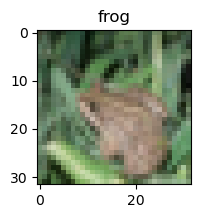

In [2]:
###
# This cell is concerned with loading and normalising the Dataset into batches
###
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import random


# Normalisation dictionary, taken from Lab 6's code to normalise CIFAR-10 dataset to mean 0, SD 1.
transform = {
    'train':transforms.Compose([
        transforms.Resize(32),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Batch size to use in dataloaders
BATCH_SIZE = 32

# Create training dataset and normalise it.
full_train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform['train'])
# Create Testing Dataset and noramlise it
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform['test'])


# Create Testing dataloader
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Training loader is not created here as dataset needs to be split in a few different ways for later experiemnts




# Get a batch of images and labels to make sure data loads properly.
print("Fetching one sample batch from test data.")
dataiter = iter(test_loader)
sample_images, sample_labels = next(dataiter)




# Define Classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Create class to ID mapping 
id2classes = {idx:clss for idx, clss in enumerate(classes)}

# Create ID to class mapping, used for confusion matrices
classes2id = {clss:idx for idx,clss in id2classes.items()}



def imshow(inp, title=None):
    """
    Shows an image from a Tensor representation.
    Taken from Lab 6 work
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(2, 2))
    plt.grid(False)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


rand = random.randint(0, BATCH_SIZE)
imshow(sample_images[rand], id2classes[int(sample_labels[rand])])


In [3]:
###
# This cell is concerned with the Creation of the Baseline Network's class.
###

import torch.nn as nn
import torch.nn.functional as F

class BaselineNetwork(nn.Module):
    """
    Class for a baseline CNN Network with randomly initialised weights.
    """

    def __init__(self):
        """
            Creates the network with already randomised weights.
        """
        super().__init__()
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)


    def forward(self, x):
        """
            Performs a forward pass of a batch / instance

            args:
                x: The input tensor, a 32x32x3 image or batch of images.
            returns:
                x: The final FC layer's logits.

        """
        # ---- Convolution Layers ----
        # First CNN layer
        x = self.pool(F.relu(self.conv1(x)))
        # Second CNN layer
        x = self.pool(F.relu(self.conv2(x))) 
        # Third CNN layer
        x = self.pool(F.relu(self.conv3(x)))

        # ---- Linear Layers ----
        # Flatten to use in Linear Layers
        x = x.view(-1, 48*3*3)
        # First Linear Layer
        x = F.relu(self.fc1(x))
        # Second Linear Layer. Doesn't use an activation
        x = self.fc2(x)
        # No softmax function is used here as loss fn handles it.


        return x


In [4]:
##
# This cell is concerned with Testing the CNN's layer sizes are correct, mainly just to validate the model is actually built correctly.
##

test_net = BaselineNetwork()

print(f"Batch size: {len(sample_images)}")

x0 = sample_images
print(f"x0 shape is: {x0.shape}")

x1 = F.relu(test_net.conv1(x0))
print(f"x1 shape is: {x1.shape}")

x2 = test_net.pool(x1)
print(f"x2 shape is: {x2.shape}")

x3 = F.relu(test_net.conv2(x2))
print(f"x3 shape is: {x3.shape}")

x4 = test_net.pool(x3)
print(f"x4 shape is: {x4.shape}")

x5 = F.relu(test_net.conv3(x4))
print(f"x5 shape is: {x5.shape}")

x6 = test_net.pool(x5)
print(f"x6 shape is: {x6.shape}")

x7 = x6.view(-1, 48*3*3)
print(f"x7 shape is: {x7.shape}")

x8 = F.relu(test_net.fc1(x7))
print(f"x8 shape is: {x8.shape}")

x9 = F.relu(test_net.fc2(x8))
print(f"x9 shape is: {x9.shape}")

pred_logits = test_net.forward(sample_images)
assert list(pred_logits.shape) == [32, 10], "Network does not output expected logits."

del [test_net, pred_logits, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9]

Batch size: 32
x0 shape is: torch.Size([32, 3, 32, 32])
x1 shape is: torch.Size([32, 16, 30, 30])
x2 shape is: torch.Size([32, 16, 15, 15])
x3 shape is: torch.Size([32, 32, 15, 15])
x4 shape is: torch.Size([32, 32, 7, 7])
x5 shape is: torch.Size([32, 48, 7, 7])
x6 shape is: torch.Size([32, 48, 3, 3])
x7 shape is: torch.Size([32, 432])
x8 shape is: torch.Size([32, 160])
x9 shape is: torch.Size([32, 10])


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

#### Part 1 - Static Learning Rate Search
In the learning rate search, the Network loss curves were plotted over 40 epochs with various learning rates ($\eta$).

<figure><center><img src="exp1_part1_learningrate_losses.png" width=1200><figcaption> Figure x. Training and validation loss curves over the five investigated learning rates, annotated with their pseudo-early-stop points.</figcaption></center></figure>

High learning rages ($\eta = 1\mathrm{e}{-2}$ and $\eta=5\mathrm{e}{-3}$) show rapid initial decreases in training loss but experience early overfitting, with validation loss diverging significantly from the training loss around epochs 10 and 15, respectively. The moderate learning rate ($\eta=1\mathrm{e}{-3}$) achieves a balance between training speed and overfitting, with only little increase in validation loss after epoch 20, giving the best validation loss of $0.740$ at epoch 32. Lower learning rates ($\eta= 5\mathrm{e}{-4}$ and $\eta=1\mathrm{e}{-4}$) result in minimal overfitting and general generalisation, although with slower convergence to the mininum point. $\eta=1\mathrm{e}{-4}$ in particular underfits within the 40-epoch timeframe.


#### Part 2 - Custom Scheduler Investigation

Derivations of the were taken and plotted for the validation loss graphs, illustrated below. Taking the earliest intercept points with the x-axis for each $\eta$ gave a set of 'step' points of epochs $9, 12, 25$ and $35$ for the custom scheduler to step the learning rate down through ${\{1\mathrm{e}{-2}, 5\mathrm{e}{-3}, 1\mathrm{e}{-3}, 5\mathrm{e}{-4}, 1\mathrm{e}{-4} \}}$. Training this custom scheduler resulted in the loss curves found in figure X.

<figure><center><img src="exp1_part2_derivation_curves.png" width=1200><figcaption> Figure x. Derivations of the averages Loss curves for each learning rate over 40 epochs, with additional smoothed lines for clarity.</figcaption></center></figure>


<figure><center><img src="exp1_part2_custom_loss_scheduler_loss_curve.png" width=600><figcaption> figure x. The training and validation loss curve for the model using the custom scheduler over 40 epochs.</figcaption></center></figure>

Training loss over this training process illustrates that the custom scheduler helps to prevent the loss value plateuing, reaching a lowest training loss of $0.166$, a reduction of $0.183$ from the best performing static learning rate training loss.
Validaiton loss over the first 12 epochs also exhibits this trend, with a fast drop in loss over the initial 12 epochs illustrating an 'accelleration' of learning being provided by the new scheduler, reaching a minimum validation loss value of $0.735$ at epoch 13. Unfortunately, overfitting occurs after this point, with the training and validation loss diverging heavily, creating a large generalisation gap.

<br><br>

Testing the best performing static and scheduled learning rate models ($\eta=1\mathrm{e}{-3}$ at epoch 13 and epoch X's scheduler model) on the unseen test set resulted in respective test-losses of 0.867 and 1.011 respectively, with the static model performing better.

In [5]:
#############################
### Code for Experiment 1 ###
#############################

###
# This cell is concerned with the creation of the data splitting, training and valiations functions used for Experiment 1, as well as a function which encapsulates a single run of a learning rate experiment.
###

from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch.optim as optim



# Splitting training data into subsets of training and validation subsets using 80:20 ratio.
def exp1_create_train_val_split(seed):
    """
    Creates a train/validation split of 80:20 for experiment 1. 
    Split is randomised based on a provided seed.

    Arguments:
        seed: the seed to use for the splitter
    
    Returns:
        Tuple of training dataloader and validation dataloader
    """
    
    # Create generator from provided seed
    generator = torch.Generator().manual_seed(seed)
    
    # Split larger training dataset into a training subset and validation subset.
    train_subset, val_subset = torch.utils.data.random_split(full_train_set, [0.8, 0.2], generator)
    
    # Create dataloader for the training subset
    train_sub_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    # Create dataloader for validation subset.
    val_sub_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    
    # return the two
    return train_sub_loader, val_sub_loader



def exp1_train(model, train_dataloader, loss_fn, optimizer, device):
    """Train Experiment 1's model on a single pass through the dataloader.

    Args:
        model: The model to perform the epoch on
        train_dataloader: The dataloader to use.
        loss_fn: The loss Criterion to use.
        optimizer: the optimizer to use, this is set up with the experiment's learning rate.
        device: The device to train on.
    
    Returns:
        model: The updated model.
        all_train_true_labels: the true training labels from all batches for this epoch.
        all_train_predicted_labels: the predicted training labels from all batches for this epoch.
        average_batch_loss: the average training loss over all of the batches for this epoch. 
        

    """
    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(train_dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        

        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()

        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(train_dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss



def exp1_evaluate(model, val_dataloader, loss_fn, device):
    """
    Evaluate Experiment 1's model through one pass of the dataloader.

    Args:
        model: The model to evaluate
        val_dataloader: The dataloader to evaluate the model on
        loss_fn: The loss function to use
        device: The device to perform the evaluation on.

    Returns:
        model: The model after evaluation
        all_val_true_labels: All of the true labels from the batches in this epoch.
        all_val_predicted_labels: All of the predicted labels from the batches in this epoch.
        average_batch_loss: The average validation loss over all of the batches in the epoch.
    """

    # Put model into evaluation mode
    model.eval()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_val_true_labels = []
    all_val_predicted_labels = []


    # don't worry about gradients during validation  
    with torch.no_grad():

        #over all batches...
        for _, data in enumerate(val_dataloader, 0):
            
            # Get the model inputs and labels of this batch
            inputs, labels = data

            # Accumulate the true labels of this batch into the all true values list
            all_val_true_labels.extend(labels.tolist())

            # move inputs and labels over to device.
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Perform a forward pass.
            outputs = model(inputs)

            # Get predicted labels for each item in batch
            _, batch_val_predicted_labels = torch.max(outputs, 1)
            # Accumulate predicted labels from this batch into all predictions list
            all_val_predicted_labels.extend(batch_val_predicted_labels.tolist())

            #calculate this batches loss
            loss = loss_fn(outputs, labels)
            current_loss = loss.item()

            running_loss += current_loss

    # calculate the average loss over every batch.
    average_batch_loss = running_loss / len(val_dataloader)

    return model, all_val_true_labels, all_val_predicted_labels, average_batch_loss



def exp1_do_one_lr_experiment(learning_rate, index, num_epochs, train_loader, val_loader):
    """
    Perform one experiment for experiment 1 with a given learning rate.

    Args:
        learning_rate: The learning rate to use for this experiment.
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.

    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
        model_list: The list of models over all epochs.
    """
    
    print(f"    Starting sub experiment {index} started.")

    # Create Model
    model = BaselineNetwork()

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    # momentum of 0.9 is taken from lab 6's code.
    

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []


    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set.
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)
        
        model_list.append(model)
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)


        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

        
    print(f"    Sub experiment {index} completed.")
    # Return the losses and accuracies for this experiment with model list.
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list


In [41]:
###
# This cell contains the main experiment Loop to train, validate and collect data over the 25 models with differing learning rates, saving all results and models afterwards.
###

import pickle


# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp1/results/exp1_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None


# create training and validation dataloaders.
train_loader, val_loader = exp1_create_train_val_split(seed=246518)

# define learning rates to test
# Values taken from lecture slides, found that 1e-1 was way too eratic and 1e-5 was too slow, so ended with values down the middle of the remaining values.
learning_rates = [1e-2, 5e-3, 1e-3, 5e-4 ,1e-4] 

# define number of runs for each learning rate
number_of_experiment_runs = 5

# Number of epochs to train for, originally used 25 but found models didn't plateau, so re-running with 40 epochs.
epochs = 40

# Create dictionary to store all statistics for each learning rate.
all_statistics = {}
# Create dictionary to store the best performing model out of the 5 runs for each learning rate. This includes early stopping!
best_models = {}

# iterate over each learning rate.
for lr in tqdm(learning_rates, desc="Progress through learning rates"):
    print()
    print(f"Starting new averaging loop for learning rate: {lr}...")
    
    # Create dictionary to store all of the statistics for this learning rate with the format { <lr> : {<metric> : {<test_idx>: [epoch1value, epoch2value]} } }
    all_statistics[lr] = {
                        'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                        'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                        'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                        'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                        }
    
    

    # create a list to store the best performing models for validation loss for each sub experiment.
    this_subexp_best_models = []

    # iterate over 5 models with different initial weights.
    for test_idx in range(1, number_of_experiment_runs+1):
        
        # train and evaluate one model of the experiment
        train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp1_do_one_lr_experiment(lr, test_idx, epochs, train_loader, val_loader)
        
        # store the experiment's results lists for this learning rate and test index.
        all_statistics[lr]['train_loss'][test_idx].append(train_loss_list)
        all_statistics[lr]['val_loss'][test_idx].append(val_loss_list)
        all_statistics[lr]['train_acc'][test_idx].append(train_acc_list)
        all_statistics[lr]['val_acc'][test_idx].append(val_acc_list)


        # Get the model with the lowest validation loss for this run and store it.
        best_model_epoch_idx = val_loss_list.index(min(val_loss_list))
        best_model = model_list[best_model_epoch_idx]
        this_subexp_best_models.append((best_model, f"Best model from sub experiment, {test_idx}, epoch {best_model_epoch_idx+1} "))
    
    # Get the best performing model from the 5 runs and store it in the best_models dictionary.
    best_models[lr] = model_list 
    #  ^^^ Turns out i made a mistake here, this should be this_subexp_best_models, not model_list. this_subexp_best_models is the list of best models from each sub experiment, 
    # model_list is the list of all models from each sub experiment. This makes best_models 5x bigger than it should be without indexes or epochs to differentiate the models.  
    # I should re-run this but i'm not going to because it's already taken 5 hours to run this and I don't fancy waiting another 5 hours for it to run again... 
    
    print(f"Completed all experiments for learning rate {lr}.")
    
        

# save results to file
with open("exp1/results/exp1_results.pkl", "wb") as f:
    pickle.dump(all_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp1/models/exp1_models.pkl", "wb") as f:
    pickle.dump(best_models, f)
    print("Models saved to file")


Progress through learning rates:   0%|          | 0/5 [00:00<?, ?it/s]


Starting new averaging loop for learning rate: 0.01...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 1.5992664309501647, val loss: 1.3045137612202677, train acc: 0.4164, val acc: 0.5307
        Epoch 2 train loss: 1.1649765041351319, val loss: 1.1938108799937435, train acc: 0.586225, val acc: 0.5898
        Epoch 3 train loss: 1.0128870920181274, val loss: 0.9760081117716841, train acc: 0.644125, val acc: 0.6591
        Epoch 4 train loss: 0.9285467993974685, val loss: 0.9463123060263003, train acc: 0.677, val acc: 0.6692
        Epoch 5 train loss: 0.868195174741745, val loss: 0.9000846488407245, train acc: 0.697775, val acc: 0.6886
        Epoch 6 train loss: 0.8193069252490998, val loss: 0.9101356147958067, train acc: 0.715725, val acc: 0.7015
        Epoch 7 train loss: 0.7864585769295692, val loss: 0.8942285814224341, train acc: 0.728625, val acc: 0.6975
        Epoch 8 train loss: 0.7627598438501358, val loss: 0.8516197673048074, train acc: 0.736975, val acc

Progress through learning rates:  20%|██        | 1/5 [59:05<3:56:20, 3545.05s/it]

        Epoch 40 train loss: 0.6200277618408203, val loss: 1.0487773107073177, train acc: 0.79565, val acc: 0.7014
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.01.

Starting new averaging loop for learning rate: 0.005...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 1.6985616307258606, val loss: 1.3855032589488898, train acc: 0.38145, val acc: 0.4954
        Epoch 2 train loss: 1.2551901267051697, val loss: 1.1337144321526964, train acc: 0.550875, val acc: 0.596
        Epoch 3 train loss: 1.0662055346012116, val loss: 1.0546385970549843, train acc: 0.6241, val acc: 0.6337
        Epoch 4 train loss: 0.9524640949010849, val loss: 0.945181500226164, train acc: 0.66665, val acc: 0.6643
        Epoch 5 train loss: 0.8656682316064834, val loss: 0.8694084668502259, train acc: 0.697675, val acc: 0.6983
        Epoch 6 train loss: 0.7985064591646195, val loss: 0.8883320423551261, train acc: 0.72275, val acc: 0.6873
        Epoch 7 train lo

Progress through learning rates:  40%|████      | 2/5 [1:59:10<2:59:02, 3580.71s/it]

        Epoch 40 train loss: 0.3690739125072956, val loss: 1.1568111423581553, train acc: 0.86975, val acc: 0.7176
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.005.

Starting new averaging loop for learning rate: 0.001...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.1072569801330565, val loss: 1.8636321408299212, train acc: 0.23015, val acc: 0.3315
        Epoch 2 train loss: 1.6903995175361632, val loss: 1.6118913150062195, train acc: 0.385925, val acc: 0.4162
        Epoch 3 train loss: 1.4832130907058716, val loss: 1.4346967219544675, train acc: 0.463, val acc: 0.4795
        Epoch 4 train loss: 1.3679608760833741, val loss: 1.311633836347074, train acc: 0.5074, val acc: 0.5303
        Epoch 5 train loss: 1.2736480116844178, val loss: 1.2244615674780581, train acc: 0.543675, val acc: 0.5626
        Epoch 6 train loss: 1.189632709646225, val loss: 1.139821180329917, train acc: 0.5776, val acc: 0.5972
        Epoch 7 train loss:

Progress through learning rates:  60%|██████    | 3/5 [2:59:12<1:59:40, 3590.18s/it]

        Epoch 40 train loss: 0.41389477013349535, val loss: 0.8477121103114594, train acc: 0.85405, val acc: 0.7363
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.001.

Starting new averaging loop for learning rate: 0.0005...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.2607835267066956, val loss: 2.120747281720463, train acc: 0.15575, val acc: 0.2221
        Epoch 2 train loss: 1.9458663666725158, val loss: 1.8124956772350276, train acc: 0.29945, val acc: 0.3499
        Epoch 3 train loss: 1.6863565127372742, val loss: 1.5966342302937857, train acc: 0.3856, val acc: 0.4076
        Epoch 4 train loss: 1.5490876150131225, val loss: 1.4986012713215984, train acc: 0.43395, val acc: 0.4523
        Epoch 5 train loss: 1.4615410709381103, val loss: 1.435754323919741, train acc: 0.470125, val acc: 0.4791
        Epoch 6 train loss: 1.386510368680954, val loss: 1.356976182506488, train acc: 0.501225, val acc: 0.5106
        Epoch 7 train l

Progress through learning rates:  80%|████████  | 4/5 [3:58:40<59:41, 3581.66s/it]  

        Epoch 40 train loss: 0.6031081760644913, val loss: 0.7765593187877545, train acc: 0.789175, val acc: 0.7434
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.0005.

Starting new averaging loop for learning rate: 0.0001...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.299528693771362, val loss: 2.29655220638068, train acc: 0.10525, val acc: 0.1174
        Epoch 2 train loss: 2.2918809127807616, val loss: 2.2866071222689204, train acc: 0.12135, val acc: 0.1376
        Epoch 3 train loss: 2.2740272762298583, val loss: 2.2570679195391867, train acc: 0.177275, val acc: 0.1994
        Epoch 4 train loss: 2.2186480543136597, val loss: 2.175741030385319, train acc: 0.20325, val acc: 0.2265
        Epoch 5 train loss: 2.1156877592086794, val loss: 2.071873247052153, train acc: 0.238725, val acc: 0.2466
        Epoch 6 train loss: 2.035808687400818, val loss: 2.019359785527848, train acc: 0.26035, val acc: 0.2594
        Epoch 7 train lo

Progress through learning rates: 100%|██████████| 5/5 [4:57:58<00:00, 3575.67s/it]

        Epoch 40 train loss: 1.1907355949401854, val loss: 1.20932194542961, train acc: 0.580375, val acc: 0.5717
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.0001.
Results saved to file
Models saved to file


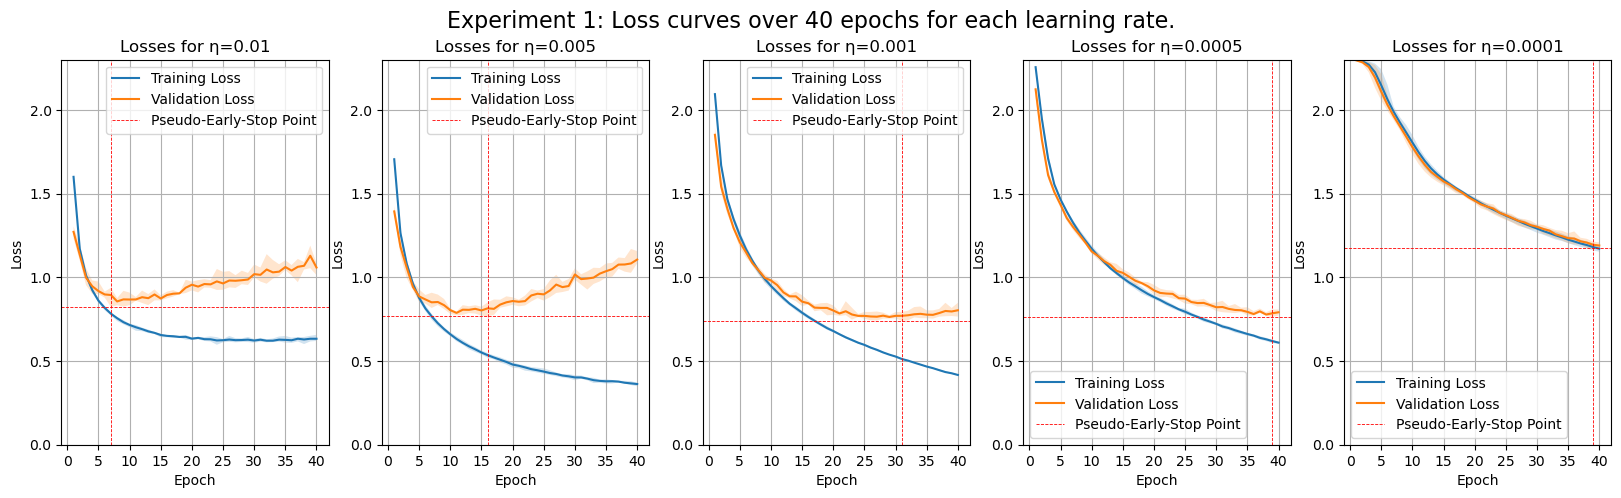

In [6]:
###
# This cell is concerned with displaying the results for the first part experiment 1, displaying the loss and accuracy graphs for each learning rate.
###

import pickle


# re-make variables as previous cell isn't going to be re-ran.
learning_rates = [1e-2, 5e-3, 1e-3, 5e-4 ,1e-4]
number_of_experiment_runs = 5
epochs = 40


# Load results fom file
with open("exp1/results/exp1_results.pkl", "rb") as file:
    all_statistics = pickle.load(file)



# Create Super Figure for all learning rates
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

fig.suptitle(f"Experiment 1: Loss curves over {epochs} epochs for each learning rate.", fontsize=16)

# For each learning rate...
for i, learning_rate in enumerate(learning_rates):
    # -- This loop will loss over the 5 experiments, averaged. --
    
    # get the results for this learning rate
    lr_results = all_statistics[learning_rate]

    # create overall lists to store values for this learning rate.
    val_loss_values = []
    train_loss_values = []


    # iterate over each test index, adding values to overall lists.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(lr_results['val_loss'][idx])
        train_loss_values.append(lr_results['train_loss'][idx])


    # Calculate the average values for each metric over sub experiments.
    average_train_losses = np.mean(train_loss_values, axis=0)[0]
    average_val_losses = np.mean(val_loss_values, axis=0)[0]

    # Get the largest values for each metric over all sub experiments.
    max_train_losses = np.max(train_loss_values, axis=0)[0]
    max_val_losses = np.max(val_loss_values, axis=0)[0]

    # Get the smallest values for each metric over all sub experiments.
    min_train_losses = np.min(train_loss_values, axis=0)[0]
    min_val_losses = np.min(val_loss_values, axis=0)[0]

    # Get the index of the best performing epoch for this learning rate.
    best_val_loss_epoch = int(np.argmin(min_val_losses)) + 1



    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))


    # plot training and validation loss graphs
    axs[i].plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
    axs[i].plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
    axs[i].axvline(best_val_loss_epoch, color='r', linestyle='--', linewidth=0.6, label="Pseudo-Early-Stop Point") # plot line going to best val loss epoch
    axs[i].axhline(min_val_losses[best_val_loss_epoch-1], color='r', linestyle='--', linewidth=0.6) # plot line going to best val loss value
    axs[i].fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
    axs[i].fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
    axs[i].set_title(f"Losses for η={learning_rate}") # add title
    axs[i].set_xlabel("Epoch") # set x label to epoch
    axs[i].set_ylabel("Loss") # set y label to loss
    axs[i].legend() # turn on legend
    axs[i].grid(True) # turn on grid
    axs[i].set_ylim(0, 2.3) # set y limit to 2.3
    axs[i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs


    # # plot training and validation accuracy graphs
    # axs[1, i].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
    # axs[1, i].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
    # axs[1, i].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
    # axs[1, i].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values 
    # axs[1, i].set_title(f"Accuracies for η={learning_rate}") # add title
    # axs[1, i].set_xlabel("Epoch") # set x label to epoch
    # axs[1, i].set_ylabel("Accuracy") # set y label to accuracy
    # axs[1, i].legend() # turn on legend
    # axs[1, i].grid(True) # turn on grid
    # axs[1, i].set_ylim(0, 1) # set y limit to 1
    # axs[1, i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# Show super figure
plt.show()


C:\Users\td336\AppData\Local\Temp\ipykernel_31612\3842903579.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


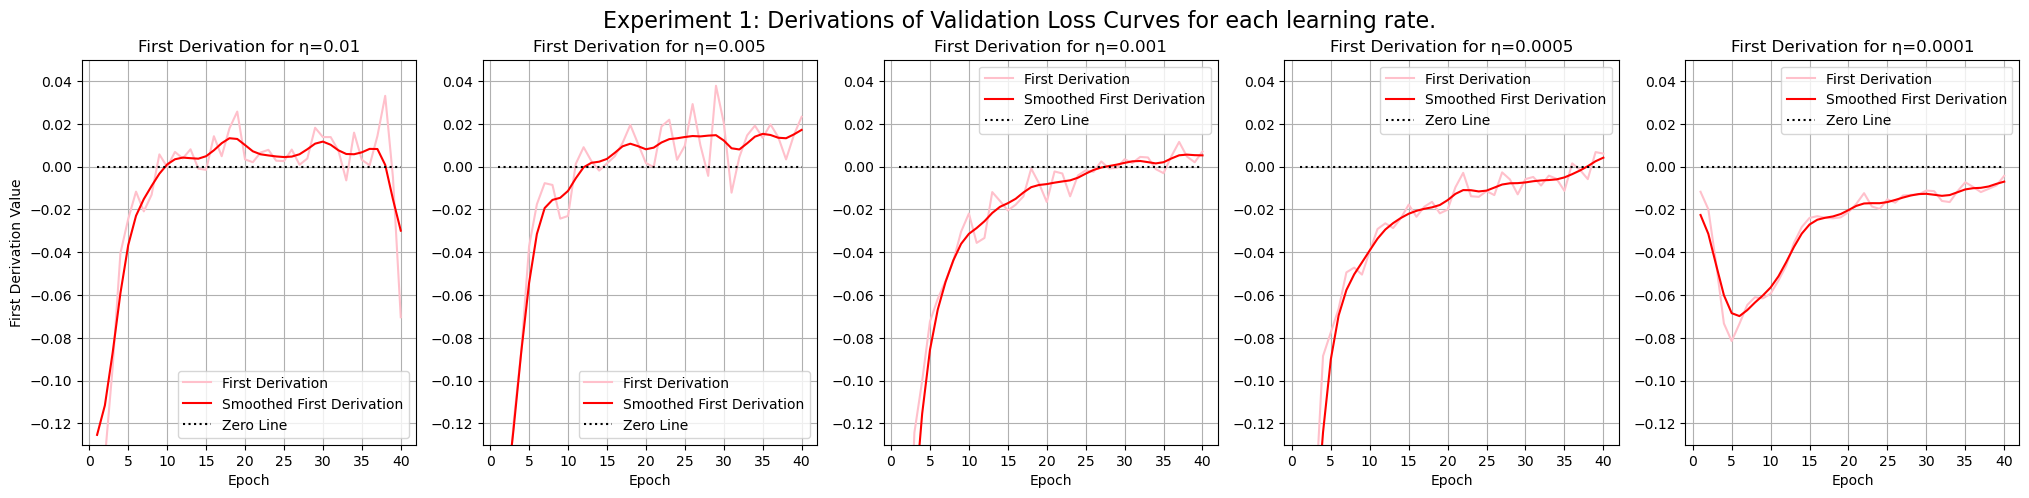

In [7]:
############################
### lr scheduler section ###
############################

###
# This cell is concerned with Finding the inflection points of each learning rate's loss curve over the validation set, for use in the custom LR scheduler.
###

from scipy.ndimage.filters import gaussian_filter1d

# Create Super Figure for the first and second derivations of the loss curves.
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle(f"Experiment 1: Derivations of Validation Loss Curves for each learning rate.", fontsize=16)

# Display the first and second derivations of the loss curves for each learning rate.
for i, learning_rate in enumerate(learning_rates):

    # get the results for this learning rate
    lr_results = all_statistics[learning_rate]

    # create list for this learning rate's validation loss values.
    val_loss_values = []


    # iterate over each test index, adding val loss to overall list.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(lr_results['val_loss'][idx])

    # calculate the average validation loss over all sub experiments for each lr value.
    average_val_losses = np.mean(val_loss_values, axis=0)[0]


    # calculate the first and second derivations. 
    val_loss_first_derivations = np.gradient(average_val_losses)


    # smooth the line to remove slight noise and find overall trend.
    val_loss_first_derivations_smooth = gaussian_filter1d(val_loss_first_derivations, sigma=1.5)

    

    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))

    # Plot first derivations
    axs[i].plot(epoch_range, val_loss_first_derivations, color='pink', label="First Derivation")
    axs[i].plot(epoch_range, val_loss_first_derivations_smooth, color='red', label="Smoothed First Derivation")
    axs[i].plot(epoch_range, [0]*len(epoch_range), color='black', linestyle='dotted', label="Zero Line")
    axs[i].set_title(f"First Derivation for η={learning_rate}")
    axs[i].set_xlabel("Epoch")
    axs[0].set_ylabel("First Derivation Value")
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_ylim(-0.13, 0.05)
    axs[i].set_xticks(np.arange(0, 41, 5))


# show the super plot
plt.show()

In [8]:

###
# This cell is concerned with creating new functions for the LR scheduler part of the experiment, including the scheduler's lambda function and its training function.
###

import torch.optim.lr_scheduler as lr_scheduler


def lr_scheduler_lambda(epoch: int) -> float:
    """
        Lambda function to create a custom lr scheduler.

        Args:
            epoch: The current epoch number. 
    
        Returns:
            lr: The new learning rate to use for this epoch.
    
    """
    
    # Manually create mapping of epochs(index) to learning rates. 
    # points where lr decreases are at epochs 9, 12, 25 & 35. 
    epoch_lr_mapping = [1e-2] * 9 + [5e-3] * 3 + [1e-3] * 13 + [5e-4] * 10 + [1e-4] * 6


    # return the learning rate for this epoch.
    return epoch_lr_mapping[epoch]
        
    




def exp1_train_with_lr_scheduler(model, train_dataloader, optimizer, loss_fn, device):
    """Train Experiment 1's model on a single pass through the dataloader, using an LR scheduler.

        Args:
            model: The model to perform the epoch on
            train_dataloader: The dataloader to use.
            loss_fn: The loss Criterion to use.
            optimizer: the optimizer to use, this is set up with the experiment's learning rate.
            scheduler: The learning rate scheduler to use.
            device: The device to train on.
        
        Returns:
            model: The updated model.
            all_train_true_labels: the true training labels from all batches for this epoch.
            all_train_predicted_labels: the predicted training labels from all batches for this epoch.
            average_batch_loss: the average training loss over all of the batches for this epoch. 
            
        """
    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(train_dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        

        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()
        

        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # Perform learning rate scheduler step for each EPOCH, not each batch. 
   

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(train_dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss






def exp1_do_one_experiment_with_scheduler(index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 1 with a custom learning rate scheduler.

    Args:
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.

    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
    """
    
    print(f"    Starting sub experiment {index} started.")

    # Create Model
    model = BaselineNetwork()

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer, momentum of 0.9 is taken from lab 6's code/
    # initialise optimizer with 1 so that lambda function calculates learning rates based on multipliers, basically removes a bunch of unnecessary maths i don't want to do.
    optimizer = torch.optim.SGD(model.parameters(), lr=1, momentum=0.9)

    
    # Create learning rate scheduler object using custom lambda function.
    scheduler = lr_scheduler.LambdaLR(optimizer, lr_scheduler_lambda)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []

    # Create list to store learning rates used for each epoch.
    all_used_lrs = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set with the learning rate scheduler.
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train_with_lr_scheduler(model, train_loader, optimizer, loss_fn,  device)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)
        
        model_list.append(model)
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)


        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

        # (this bugged me for several hours trying to figure out why my scheduler was giving index errors on my scheduler list!!!) 
        scheduler.step()

        # Track learning rates used:
        last_lr = scheduler.get_last_lr()
        print(f"        Learning rate for ^ epoch: {last_lr}")
        all_used_lrs.append(last_lr)
        
    print(f"    Sub experiment {index} completed.")
    # Return the losses and accuracies for this experiment
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list



In [11]:
###
# This cel is concerned with the main Experiment Loop for the scheduler, training and validating the models with the custom scheduler over 5 runs, saving all results and models afterwards.
###


# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp1/results/exp1_custom_scheduler_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None


# create training and validation dataloaders.
train_loader, val_loader = exp1_create_train_val_split(seed=246518)

# define parameters for the experiment
number_of_experiment_runs = 5
epochs = 40

# Create dictionary to store all of the statistics with the format {<metric> : { <test_idx> : [epoch1value, epoch2value] } }
scheduler_statistics = {
                    'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                    'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                    }


# iterate over 5 models with different initial weights.
for test_idx in range(1, number_of_experiment_runs+1):
    

    
    # train and evaluate one model.
    train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp1_do_one_experiment_with_scheduler(test_idx, epochs, train_loader, val_loader)
    

    # store the experiment's results lists for this learning rate and test index.
    scheduler_statistics['train_loss'][test_idx].append(train_loss_list)
    scheduler_statistics['val_loss'][test_idx].append(val_loss_list)
    scheduler_statistics['train_acc'][test_idx].append(train_acc_list)
    scheduler_statistics['val_acc'][test_idx].append(val_acc_list)


    # Get the model with the lowest validation loss for this run and store it.
    scheduler_best_model_epoch_idx = val_loss_list.index(min(val_loss_list))
    scheduler_best_model = model_list[scheduler_best_model_epoch_idx]
    



# save results to file
with open("exp1/results/exp1_custom_scheduler_results.pkl", "wb") as f:
    pickle.dump(scheduler_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp1/models/best_custom_scheduler_model.pkl", "wb") as f:
    pickle.dump(scheduler_best_model, f)
    print("Models saved to file")


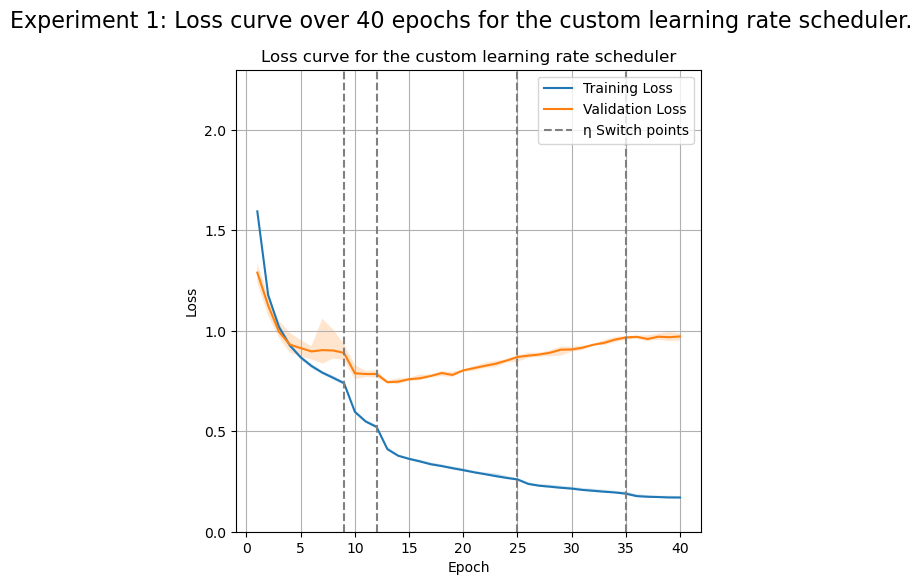

In [9]:
##
# This cell is concerned with showing the results for the scheduler experiment.
##

import pickle
# Load results from file
with open("exp1/results/exp1_custom_scheduler_results.pkl", "rb") as file:
    scheduler_statistics = pickle.load(file)


# create overall lists to store values for this learning rate.
val_loss_values = []
train_loss_values = []
val_acc_values = []
train_acc_values = []

# iterate over each test index, adding values to overall lists.
for idx in range(1, number_of_experiment_runs+1):
    val_loss_values.append(scheduler_statistics['val_loss'][idx])
    train_loss_values.append(scheduler_statistics['train_loss'][idx])
    val_acc_values.append(scheduler_statistics['val_acc'][idx])
    train_acc_values.append(scheduler_statistics['train_acc'][idx])


# Calculate the average values for each metric over sub experiments.
average_train_losses = np.mean(train_loss_values, axis=0)[0]
average_val_losses = np.mean(val_loss_values, axis=0)[0]
average_train_accs = np.mean(train_acc_values, axis=0)[0]
average_val_accs = np.mean(val_acc_values, axis=0)[0]

# Get the largest values for each metric over all sub experiments.
max_train_losses = np.max(train_loss_values, axis=0)[0]
max_val_losses = np.max(val_loss_values, axis=0)[0]
max_train_accs = np.max(train_acc_values, axis=0)[0]
max_val_accs = np.max(val_acc_values, axis=0)[0]

# Get the smallest values for each metric over all sub experiments.
min_train_losses = np.min(train_loss_values, axis=0)[0]
min_val_losses = np.min(val_loss_values, axis=0)[0]
min_train_accs = np.min(train_acc_values, axis=0)[0]
min_val_accs = np.min(val_acc_values, axis=0)[0]


# create epoch range for x axis
epoch_range = list(range(1, epochs+1))

# Create Super Figure for all learning rates
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

fig.suptitle(f"Experiment 1: Loss curve over {epochs} epochs for the custom learning rate scheduler.", fontsize=16)

# plot training and validation loss graphs
axs.plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
axs.plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
axs.vlines([9, 12, 25, 35], 0, 2.3, color='gray', linestyle='dashed', label="η Switch points") # plot vertical lines for changes in learning rate.

axs.fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
axs.fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
axs.set_title("Loss curve for the custom learning rate scheduler") # add title
axs.set_xlabel("Epoch") # set x label to epoch
axs.set_ylabel("Loss") # set y label to loss
axs.legend() # turn on legend
axs.grid(True) # turn on grid
axs.set_ylim(0, 2.3) # set y limit to 2.3
axs.set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs


# # plot training and validation accuracy graphs
# axs[1].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
# axs[1].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
# axs[1].vlines([9, 12, 25, 35], 0, 2.3, color='gray', linestyle='dashed', label="η Switch points") # plot vertical lines for changes in learning rate.

# axs[1].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
# axs[1].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values 
# axs[1].set_title("Accuracy curve for the custom learning rate scheduler") # add title
# axs[1].set_xlabel("Epoch") # set x label to epoch
# axs[1].set_ylabel("Accuracy") # set y label to accuracy
# axs[1].legend() # turn on legend
# axs[1].grid(True) # turn on grid
# axs[1].set_ylim(0, 1) # set y limit to 1
# axs[1].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# Show the super figure

plt.show()


In [10]:
###
# This cell is concerned with loading the best models from the first part of the experiment and the scheduler test, then comparing them on the test set.
# This cell could be formatted a bit better, but running it may cause inconsistency issues through training.
###


# Load the best models from the first part of the experiment
with open("exp1/models/exp1_models.pkl", "rb") as file:
    best_exp1_models = pickle.load(file)

# Load the results from the first part of the experiment. M
with open("exp1/results/exp1_results.pkl", "rb") as file:
    all_results = pickle.load(file)


# Find the best model's values from the first part of the experiment. 

# init tracking varibales
best_lr = None
best_experiment_idx = None
best_epoch_idx = None
best_val_loss = float('inf')

# for each learning rate
for lr, measures in all_results.items():
    # check all experiment indexes for loss values
    for experiment_index, loss_list in measures['val_loss'].items():
        loss_list = loss_list[0]
        # check all epochs for loss values
        for epoch_idx, loss_value in enumerate(loss_list):
            # if current loss value is less than the best loss value, update the best values.
            if loss_value < best_val_loss:
                best_lr = lr
                best_experiment_idx = experiment_index
                best_epoch_idx = epoch_idx
                best_val_loss = loss_value

print(f"Best model over LR search has lr: {best_lr}, experiment index: {best_experiment_idx}, epoch index: {best_epoch_idx}, val loss: {best_val_loss}")


# load the best model from initial 25 model test
best_experiment_1_model = best_exp1_models[best_lr][best_experiment_idx]

# load the best model from the scheduler test
with open("exp1/models/best_custom_scheduler_model.pkl", "rb") as file:
    best_scheduler_model = pickle.load(file)




# --Compare the two models on the same test set--

# run scheduler model
print("Testing scheduler model...")
_, true_test_labels_scheduler_model, predicted_test_labels_scheduler_model, average_test_loss_scheduler_model = exp1_evaluate(best_scheduler_model, test_loader, nn.CrossEntropyLoss(), device)

# run search model
print("Testing search model...")
_, true_test_labels_search_model, predicted_test_labels_search_model, average_test_loss_search_model = exp1_evaluate(best_experiment_1_model, test_loader, nn.CrossEntropyLoss(), device)



Best model over LR search has lr: 0.001, experiment index: 1, epoch index: 30, val loss: 0.7395311202199314
Testing scheduler model...
Testing search model...


Average test loss for scheduler model: 1.0110018564679752
Average test loss for search model: 0.866762349685541
--
Confusion matrix, without normalization


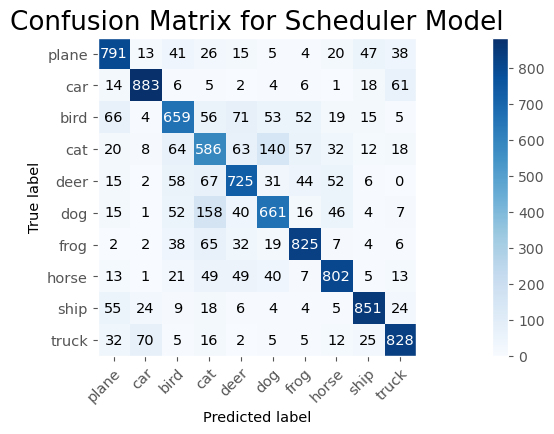

Confusion matrix, without normalization


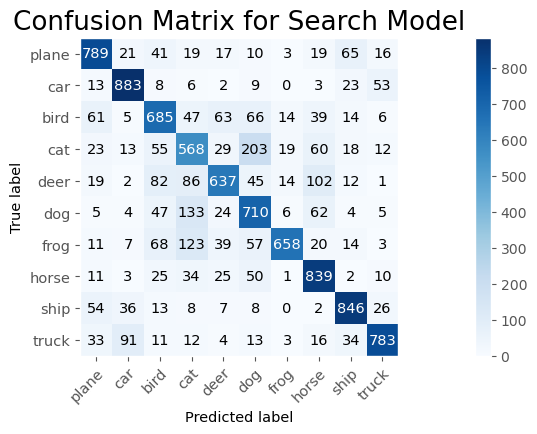

In [13]:
###
# This cell is concerned with visualising the results for the scheduler and static learning rate model.
###

from ml_things import plot_confusion_matrix

# print test loss results
print(f"Average test loss for scheduler model: {average_test_loss_scheduler_model}")
print(f"Average test loss for search model: {average_test_loss_search_model}")

print("--")


# plot confusion matrices for both models
plot_confusion_matrix(true_test_labels_scheduler_model, predicted_test_labels_scheduler_model, magnify=0.06, classes=classes, verbose=False, use_title="Confusion Matrix for Scheduler Model")
plot_confusion_matrix(true_test_labels_search_model, predicted_test_labels_search_model, magnify=0.06, classes=classes, verbose=False, use_title="Confusion Matrix for Search Model")

None

### Experiment 2 (19 MARKS) <ignore>

#### Part 1 - Dropout Search
(150 words)
#### Part 2 - Transfer Learning Task
(150 words)
look at bar chart for details.

In [11]:
#############################
### Code for Experiment 2 ###
#############################

###
# This cell is concerned with creating the classes and functions used for Experiment 2's Dropout Search.
###

class DropoutNetwork(nn.Module):
    """
    Class for the CNN Network with Dropout layers for Experiment 2.
    """

    def __init__(self, dropout_rate):
        """
        Creates the network with randomised weights and with the provided dropout rate.

        Args:
            dropout_rate: The dropout rate to use for the network's FC layers.
        """
        super().__init__()
        
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create dropout layer used throughout
        self.dropout = nn.Dropout(p=dropout_rate)

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)

    def forward(self, x):
        """
            Performs a forward pass of a batch / instance.

        Args:
            x: The input tensor, a 32x32x3 image or batch of images.

        Returns:
            x: The final FC layer's logits.
        """
        # First CNN layer
        x = self.pool(F.relu(self.conv1(x)))
        # Second CNN layer
        x = self.pool(F.relu(self.conv2(x)))
        # Third CNN layer
        x = self.pool(F.relu(self.conv3(x)))

        # ---- linear layers ----
        # Flatten to use in linear layers
        x = x.view(-1, 48*3*3)
        # First Dropout layer
        x = self.dropout(x)
        # First Linear layer
        x = F.relu(self.fc1(x))
        # Second Dropout layer
        x = self.dropout(x)
        # Second Linear layer
        x = self.fc2(x)
        # No softmax function as CrossEntropyLoss includes it.


        return x
    
    

def exp2_create_train_val_split(seed):
    """
    Creates a train/validation split of 50:50 for experiment 2. 
    Split is randomised based on a provided seed.

    Arguments:
        seed: the seed to use for the splitter
    
    Returns:
        Tuple of dataloaders for subset 1 and subset 2
    """
    
    # Create generator from provided seed
    generator = torch.Generator().manual_seed(seed)
    
    # Split larger training dataset into a training subset and validation subset.
    train_subset, val_subset = torch.utils.data.random_split(full_train_set, [0.5, 0.5], generator)
    
    # Create dataloader for the first subset
    subset_1_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    # Create dataloader for second subset.
    subset_2_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    
    # return the two
    return subset_1_loader, subset_2_loader


def exp2_do_one_dropout_experiment(dropout_value, index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 2 with a given dropout value.
    This fn is pretty much a copy paste of the first experiment's function with dropout added in.

    Args:
        dropout_value: The dropout value to use for this experiment.
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.
    
    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
        model_list: The list of models over all epochs.
    """

    print(f"    Starting sub experiment {index}.")

    # Create Dropout model
    model = DropoutNetwork(dropout_value)

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer using Experiment 1's best performing learning rate (no scheduler, as using no scheduler in experiment 1 performed best)
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device) # turns out exp1 train fn can be used for this, no need to remake it. (i think...)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device) # same story here, should be fine to use exp1's evaluate function.
        
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses, accuracies and models to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        model_list.append(model)
        
        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")


    print(f"    Completed sub experiment {index}.")

    # Return the losses and accuracies for this experiment with model list
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list



In [16]:
###
# This cell is concerned with the main experiment loop to train, validate and collect data for 5 dropout rates over 5 models.
###


# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp2/results/exp2_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None

# create set 1 and set 2 dataloaders.
set_1_loader, set_2_loader = exp2_create_train_val_split(seed=246518)

# Define dropout rates to test
dropout_rates = [0, 0.35, 0.5, 0.65, 0.85] # see 'Experiment 2' experiments section for reasoning behind these values.

# Define number of runs for each dropout rate
number_of_experiment_runs = 5

# Number of epochs to train for.
epochs = 40

# create dictionary to store all statisfics for each dropout rate.
all_dropout_statistics = {}

# Create dictionary to store the best models for each dropout rate.
best_models = {}

# iterate over each dropout rate.
for dr in tqdm(dropout_rates, "Progress through dropout experiments"):
    print()
    print(f"Starting new averaging loop for dropout: {dr}...")

    # create dictionary with empty lists to store all statistics for this dropout rate.
    all_dropout_statistics[dr] = {
                    'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                    'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                    }

    # Create a list to store the best performing models for each validation loss over each sub experiment
    this_subexp_best_models = []

    # Iterate over 5 models with different initial weights.
    for test_idx in range(1, number_of_experiment_runs+1):

        # Train and evaluate one model of the experiment.
        train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp2_do_one_dropout_experiment(dr, test_idx, epochs, set_1_loader, set_2_loader)

        # store the experiment's results lists for this dropout rate and test index.
        all_dropout_statistics[dr]['train_loss'][test_idx].append(train_loss_list)
        all_dropout_statistics[dr]['val_loss'][test_idx].append(val_loss_list)
        all_dropout_statistics[dr]['train_acc'][test_idx].append(train_acc_list)
        all_dropout_statistics[dr]['val_acc'][test_idx].append(val_acc_list)

        # Get the model with the lowest validation loss for this run and store it.
        min_val_loss = min(val_loss_list) # get the minimum validation loss for this sub experiment.
        best_model_epoch_idx = val_loss_list.index(min_val_loss)  # get the index of the best model.
        best_model = model_list[best_model_epoch_idx] # get the best model from the list of models using the calculated index.
        this_subexp_best_models.append({'model':best_model, 'val_loss':min_val_loss, 'epoch':best_model_epoch_idx+1, 'test_idx':test_idx}) # store the best model and some info about it.


    # save the model to the best_models dictionary. doing it properly this time!!!!
    best_models[dr] = this_subexp_best_models
    print(f"Completed all experiments for dropout: {dr}.")

# save results to file
with open("exp2/results/exp2_results.pkl", "wb") as file:
    pickle.dump(all_dropout_statistics, file)
    print("Results saved to file")

# Save models to file
with open("exp2/models/best_dropout_models.pkl", "wb") as file:
    pickle.dump(best_models, file)
    print("Models saved to file")


Progress through dropout experiments:   0%|          | 0/5 [00:00<?, ?it/s]


Starting new averaging loop for dropout: 0...
    Starting sub experiment 1.


c:\Users\td336\AppData\Local\anaconda3\envs\GPUenv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


        Epoch 1 train loss: 2.1793643725497645, val loss: 2.010071883421115, train acc: 0.19792, val acc: 0.2736
        Epoch 2 train loss: 1.8617744026586527, val loss: 1.7192173824285912, train acc: 0.32236, val acc: 0.37924
        Epoch 3 train loss: 1.622399080287465, val loss: 1.5837215326936043, train acc: 0.40532, val acc: 0.42224
        Epoch 4 train loss: 1.4953448621513288, val loss: 1.46723552311168, train acc: 0.45652, val acc: 0.4656
        Epoch 5 train loss: 1.4124092677670061, val loss: 1.376057291046128, train acc: 0.4878, val acc: 0.508
        Epoch 6 train loss: 1.3322290565504138, val loss: 1.3162951320790879, train acc: 0.52248, val acc: 0.53068
        Epoch 7 train loss: 1.266661154187244, val loss: 1.29869207541656, train acc: 0.54768, val acc: 0.5438
        Epoch 8 train loss: 1.2120014526654996, val loss: 1.2367890398673085, train acc: 0.5706, val acc: 0.5544
        Epoch 9 train loss: 1.1619013130969709, val loss: 1.1678717641726784, train acc: 0.59148

Progress through dropout experiments:  20%|██        | 1/5 [56:42<3:46:50, 3402.64s/it]

        Epoch 40 train loss: 0.48436822357308834, val loss: 0.9077742160738581, train acc: 0.83308, val acc: 0.71008
    Completed sub experiment 5.
Completed all experiments for dropout: 0.

Starting new averaging loop for dropout: 0.35...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.229772129022252, val loss: 2.0498684990741407, train acc: 0.15884, val acc: 0.24464
        Epoch 2 train loss: 1.973597507037775, val loss: 1.8104482015685353, train acc: 0.2688, val acc: 0.34596
        Epoch 3 train loss: 1.7740630236123225, val loss: 1.6990470520370757, train acc: 0.33608, val acc: 0.38664
        Epoch 4 train loss: 1.663979771649441, val loss: 1.5741446329199749, train acc: 0.38668, val acc: 0.4276
        Epoch 5 train loss: 1.5903853867060083, val loss: 1.4967513918266881, train acc: 0.41328, val acc: 0.45512
        Epoch 6 train loss: 1.539976251247289, val loss: 1.4576799607337894, train acc: 0.43756, val acc: 0.47584
        Epoch 7 train loss: 1.48522123244717

Progress through dropout experiments:  40%|████      | 2/5 [1:54:25<2:51:54, 3438.20s/it]

        Epoch 40 train loss: 0.8655115812635787, val loss: 0.8359737703028847, train acc: 0.69412, val acc: 0.70492
    Completed sub experiment 5.
Completed all experiments for dropout: 0.35.

Starting new averaging loop for dropout: 0.5...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.266932343887856, val loss: 2.130962587683402, train acc: 0.13972, val acc: 0.23396
        Epoch 2 train loss: 2.0528388034047373, val loss: 1.9016987442055626, train acc: 0.23864, val acc: 0.315
        Epoch 3 train loss: 1.873906119095395, val loss: 1.7205296337147198, train acc: 0.30836, val acc: 0.37084
        Epoch 4 train loss: 1.7383737448231338, val loss: 1.6255090870820652, train acc: 0.3514, val acc: 0.40232
        Epoch 5 train loss: 1.6549646906230762, val loss: 1.532182332652304, train acc: 0.38912, val acc: 0.43788
        Epoch 6 train loss: 1.600181833405019, val loss: 1.4978998096092888, train acc: 0.4116, val acc: 0.4476
        Epoch 7 train loss: 1.5542539437408642,

Progress through dropout experiments:  60%|██████    | 3/5 [2:52:09<1:55:00, 3450.01s/it]

        Epoch 40 train loss: 0.9644615323570989, val loss: 0.860951615378375, train acc: 0.66136, val acc: 0.69696
    Completed sub experiment 5.
Completed all experiments for dropout: 0.5.

Starting new averaging loop for dropout: 0.65...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.2641552909255944, val loss: 2.1660660221753525, train acc: 0.14392, val acc: 0.21312
        Epoch 2 train loss: 2.111435478453136, val loss: 1.9954518485252204, train acc: 0.21128, val acc: 0.28076
        Epoch 3 train loss: 1.9660220202582572, val loss: 1.8027723274572427, train acc: 0.255, val acc: 0.33244
        Epoch 4 train loss: 1.8411227397601624, val loss: 1.7200833545316516, train acc: 0.29508, val acc: 0.37412
        Epoch 5 train loss: 1.7685854375514838, val loss: 1.6383495542704296, train acc: 0.3318, val acc: 0.3944
        Epoch 6 train loss: 1.7064634474647014, val loss: 1.5798841121861391, train acc: 0.3594, val acc: 0.41988
        Epoch 7 train loss: 1.64992073887144

Progress through dropout experiments:  80%|████████  | 4/5 [3:49:56<57:36, 3456.52s/it]  

        Epoch 40 train loss: 1.123118487541633, val loss: 0.9930632365176745, train acc: 0.60784, val acc: 0.64212
    Completed sub experiment 5.
Completed all experiments for dropout: 0.65.

Starting new averaging loop for dropout: 0.85...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.301991300814597, val loss: 2.2883279149794515, train acc: 0.11012, val acc: 0.19344
        Epoch 2 train loss: 2.260391103946949, val loss: 2.1612453457644527, train acc: 0.1422, val acc: 0.1982
        Epoch 3 train loss: 2.1616177057366235, val loss: 2.054578564813375, train acc: 0.18232, val acc: 0.21148
        Epoch 4 train loss: 2.06693103764673, val loss: 1.9283962393050913, train acc: 0.19576, val acc: 0.26248
        Epoch 5 train loss: 1.9856564244041053, val loss: 1.857931562854201, train acc: 0.2112, val acc: 0.27588
        Epoch 6 train loss: 1.9443572625479735, val loss: 1.816583582812258, train acc: 0.22816, val acc: 0.31044
        Epoch 7 train loss: 1.919994718735785, 

Progress through dropout experiments: 100%|██████████| 5/5 [4:48:10<00:00, 3458.03s/it]

        Epoch 40 train loss: 1.5305878555073458, val loss: 1.3361422539976857, train acc: 0.414, val acc: 0.49792
    Completed sub experiment 5.
Completed all experiments for dropout: 0.85.
Results saved to file
Models saved to file


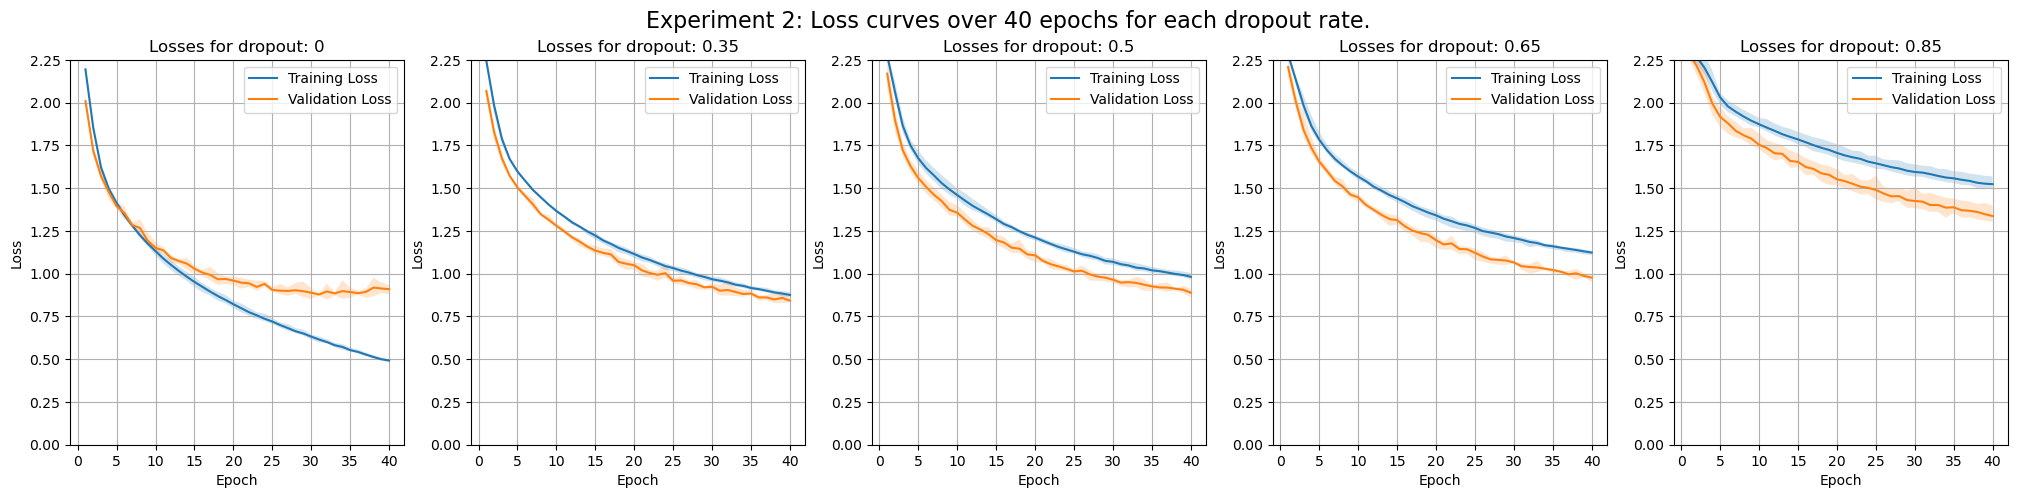

In [12]:
###
# This cell is concerned with displaying the results of the dropout search.
###

# Load results from file
with open("exp2/results/exp2_results.pkl", "rb") as file:
    all_dropout_statistics = pickle.load(file)

# Create Super Figure for all dropout rates
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle(f"Experiment 2: Loss curves over {epochs} epochs for each dropout rate.", fontsize=16)


dropout_rates = [0, 0.35, 0.5, 0.65, 0.85]
# For each dropout rate...
for i, dr in enumerate(dropout_rates):
    # --- Thid loop displays loss over the 5 experiments, averaged ---

    # get the results from this dropout rate
    dr_results = all_dropout_statistics[dr]

    # create overall lists to store values for this dropout rate.
    val_loss_values = []
    train_loss_values = []
    # val_acc_values = []
    # train_acc_values = []

    # iterate over each test index, adding values to overall lists.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(dr_results['val_loss'][idx])
        train_loss_values.append(dr_results['train_loss'][idx])
        # val_acc_values.append(dr_results['val_acc'][idx])
        # train_acc_values.append(dr_results['train_acc'][idx])
    
    # Calculate the average values for each metric over sub experiments.
    average_train_losses = np.mean(train_loss_values, axis=0)[0]
    average_val_losses = np.mean(val_loss_values, axis=0)[0]
    # average_train_accs = np.mean(train_acc_values, axis=0)[0]
    # average_val_accs = np.mean(val_acc_values, axis=0)[0]

    # Get the largest values for each metric over all sub experiments.
    max_train_losses = np.max(train_loss_values, axis=0)[0]
    max_val_losses = np.max(val_loss_values, axis=0)[0]
    # max_train_accs = np.max(train_acc_values, axis=0)[0]
    # max_val_accs = np.max(val_acc_values, axis=0)[0]

    # Get the smallest values for each metric over all sub experiments.
    min_train_losses = np.min(train_loss_values, axis=0)[0]
    min_val_losses = np.min(val_loss_values, axis=0)[0]
    # min_train_accs = np.min(train_acc_values, axis=0)[0]
    # min_val_accs = np.min(val_acc_values, axis=0)[0]

    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))

    # plot training and validation loss graphs
    axs[i].plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
    axs[i].plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
    axs[i].fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
    axs[i].fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
    axs[i].set_title(f"Losses for dropout: {dr}") # add title
    axs[i].set_xlabel("Epoch") # set x label to epoch
    axs[i].set_ylabel("Loss") # set y label to loss
    axs[i].legend() # turn on legend
    axs[i].grid(True) # turn on grid
    axs[i].set_ylim(0, 2.25) # set y limit to 2.25
    axs[i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

    # # plot training and validation accuracy graphs
    # axs[1, i].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
    # axs[1, i].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
    # axs[1, i].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
    # axs[1, i].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values
    # axs[1, i].set_title(f"Accuracies for dropout: {dr}") # add title
    # axs[1, i].set_xlabel("Epoch") # set x label to epoch
    # axs[1, i].set_ylabel("Accuracy") # set y label to accuracy
    # axs[1, i].legend() # turn on legend
    # axs[1, i].grid(True) # turn on grid
    # axs[1, i].set_ylim(0, 1) # set y limit to 1
    # axs[1, i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# Show super figure
plt.show()


# The results for Experiment 2's dropout search are displayed below. The results show that dropout .. where the generalisation gap follows a valley of sorts. 

In [13]:
##
# This cell is concerned with creating functions to train and evaluate the transfer learning experiment, as well as loading the best models from the dropout search.
##

def exp2_train_and_eval_transfer_model(model, num_epochs, train_loader, val_loader):
    """
    
    This function is a near-copy of exp2_do_one_dropout_experiment, but with the ability to train and evaluate a given model.
    
    Performs one transfer learning experiment with a given model.
    
    Args:
        model: The model to use for this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.
    
    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
        model_list: The list of models over all epochs.
    """


    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer using Experiment 1's best performing learning rate (no scheduler, as using no scheduler in experiment 1 performed best)
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device) # turns out exp1 train fn can be used for this, no need to remake it. (i think...)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device) # same story here, should be fine to use exp1's evaluate function.
        
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses, accuracies and models to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        model_list.append(model)
        
        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")


    # Return the losses and accuracies for this experiment with model list
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list




# load all models from the dropout search

with open("exp2/models/best_dropout_models.pkl", "rb") as file:
    dropout_models = pickle.load(file)


# # Load the zero dropout model from the first part of the experiment.
best_zero_dropout_model = dropout_models[0][4]['model']
bst_nd_mdl_vl = dropout_models[0][4]['val_loss']
print(f"Best zero dropout model loaded from epoch {dropout_models[0][4]['epoch']} with val loss {bst_nd_mdl_vl}")

# Find and Load the best performing dropout model
best_dropout_model = dropout_models[0.35][2]['model']
bst_do_mdl_vl = dropout_models[0.35][2]['val_loss']
print(f"Best dropout model loaded from epoch {dropout_models[0.35][2]['epoch']} with val loss {bst_do_mdl_vl}")

print("--------------------------------------------------------------------")

Best zero dropout model loaded from epoch 32 with val loss 0.8471960276746384
Best dropout model loaded from epoch 38 with val loss 0.8289597420893666
--------------------------------------------------------------------


In [14]:
##
# This cell is concerned with testing both models on the test set, before the transfer learning task.
##

# test the non-dropout model before transfer learning task on the held test set.
best_zero_dropout_model, true_test_labels_no_dropout_model, predicted_test_labels_no_dropout_model, average_test_loss_no_dropout_model = exp1_evaluate(best_zero_dropout_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"Best zero dropout model tested on test set without transfer learning task has average test loss of: {average_test_loss_no_dropout_model}")

# test the best dropout model before transfer learning task on the held test set.
best_dropout_model, true_test_labels_best_dropout_model, predicted_test_labels_best_dropout_model, average_test_loss_best_dropout_model = exp1_evaluate(best_dropout_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"Best dropout model tested on test set without transfer learning task has average test loss of: {average_test_loss_best_dropout_model}")
print("--------------------------------------------------------------------")
    

# REMEMBER TO PLOT A BAR CHART FOR BOTH MODELS AFTER THIS!!!!!

Best zero dropout model tested on test set without transfer learning task has average test loss of: 0.8947452898985281
Best dropout model tested on test set without transfer learning task has average test loss of: 0.825200680345773
--------------------------------------------------------------------


In [16]:

##
# This cell is concerned with setting up and running the Transfer Learning Task, saving the best models and results to file.
##

# freeze zero dropout model's convolutional layers and reset linear layers
for layer in best_zero_dropout_model.parameters():
    if isinstance(layer, nn.Conv2d):
        # Freeze convolutional layers
        layer.requires_grad = False
    if isinstance(layer, nn.Linear):
        # Reset linear layers
        layer.reset_parameters()

# freeze dropout model's convolutional layers and reset linear layers
for layer in best_dropout_model.parameters():
    if isinstance(layer, nn.Conv2d):
        print("Froze Conv2d layer.")
        # Freeze convolutional layers
        layer.requires_grad = False
    if isinstance(layer, nn.Linear):
        # Reset linear layers
        print("Reset Linear layer.")
        layer.reset_parameters()



# recreate set 1 and set 2 dataloaders as jupyter kernel restarted and i don't want to run traning cell again that defines them again.
set_1_loader, set_2_loader = exp2_create_train_val_split(seed=246518)

fine_tune_epochs = 15
# Train and evaluate the zero dropout model on the transfer learning task over 5 epochs.
zero_do_train_losses, zero_do_val_losses, zero_do_train_accuracies, zero_do_val_accuracies, zero_do_model_list = exp2_train_and_eval_transfer_model(best_zero_dropout_model, fine_tune_epochs, train_loader=set_2_loader, val_loader=set_1_loader)  # Swapped the train and val loaders around here. 

# Train and evaluate the best dropout model on the transfer learning task over 5 epochs.
best_do_train_losses, best_do_val_losses, best_do_train_accuracies, best_do_val_accuracies, best_do_model_list = exp2_train_and_eval_transfer_model(best_dropout_model, fine_tune_epochs, train_loader=set_2_loader, val_loader=set_1_loader)  # And here.

# save results to file

# get best performing transferred models for early stopping.
zero_do_best_model_after_transfer = zero_do_model_list[np.argmin(zero_do_val_losses)]
best_do_best_model_after_transfer = best_do_model_list[np.argmin(best_do_val_losses)]

# save zero dropout model from tl task
with open("exp2/transfer-learning-task/best_zero_dropout_model_after_transfer.pkl", "wb") as file:
    pickle.dump(zero_do_best_model_after_transfer, file)
    print("Zero dropout model saved to file")


# save best dropout model from tl task
with open("exp2/transfer-learning-task/best_dropout_model_after_transfer.pkl", "wb") as file:
    pickle.dump(best_do_best_model_after_transfer, file)
    print("Best dropout model saved to file")

# save results to file
with open("exp2/transfer-learning-task/transfer_learning_results.pkl", "wb") as file:
    pickle.dump({
        'zero_dropout':{
            'train_loss':zero_do_train_losses,
            'val_loss':zero_do_val_losses,
            'train_acc':zero_do_train_accuracies,
            'val_acc':zero_do_val_accuracies
        },
        'best_dropout':{
            'train_loss':best_do_train_losses,
            'val_loss':best_do_val_losses,
            'train_acc':best_do_train_accuracies,
            'val_acc':best_do_val_accuracies
        }
    }, file)
    print("Results saved to file")


c:\Users\td336\AppData\Local\anaconda3\envs\GPUenv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


        Epoch 1 train loss: 1.115394651203814, val loss: 0.9177580007811641, train acc: 0.6102, val acc: 0.68016
        Epoch 2 train loss: 0.9663743477343293, val loss: 0.9444007948231514, train acc: 0.6626, val acc: 0.67184
        Epoch 3 train loss: 0.8935522644416146, val loss: 0.9627424240340967, train acc: 0.69084, val acc: 0.6754
        Epoch 4 train loss: 0.8475501084571604, val loss: 0.863665144080701, train acc: 0.70596, val acc: 0.69788
        Epoch 5 train loss: 0.8101195828689028, val loss: 0.888341547354408, train acc: 0.71688, val acc: 0.69852
        Epoch 6 train loss: 0.7729164469043922, val loss: 0.9257372947757506, train acc: 0.73028, val acc: 0.68788
        Epoch 7 train loss: 0.7480801946824164, val loss: 0.8509700620723197, train acc: 0.7396, val acc: 0.71236
        Epoch 8 train loss: 0.7212556826184168, val loss: 0.9221484913011951, train acc: 0.75076, val acc: 0.69164
        Epoch 9 train loss: 0.7171208418315024, val loss: 0.9050148265517276, train acc

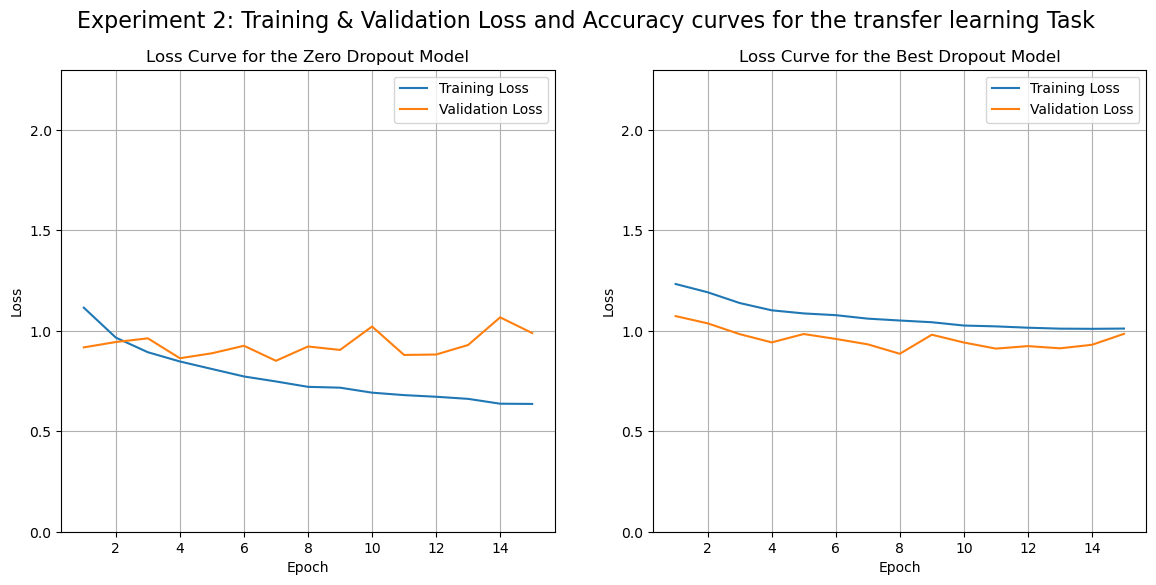

In [15]:
###
# This cell is concerned with showing the results from training and validation of both models on the transfer learning task.
###

# Load results from file
with open("exp2/transfer-learning-task/transfer_learning_results.pkl", "rb") as file:
    transfer_learning_statistics = pickle.load(file)

# get the training and validation losses for zero dropout model.
zero_do_train_losses = transfer_learning_statistics['zero_dropout']['train_loss']
zero_do_val_losses = transfer_learning_statistics['zero_dropout']['val_loss']
# get the training and validation losses for best dropout model.
best_do_train_losses = transfer_learning_statistics['best_dropout']['train_loss']
best_do_val_losses = transfer_learning_statistics['best_dropout']['val_loss']

fine_tune_epochs = 15
# create epoch range for x axis
epoch_range = list(range(1, fine_tune_epochs+1))




# Create Super Figure for all learning rates
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle(f"Experiment 2: Training & Validation Loss and Accuracy curves for the transfer learning Task", fontsize=16)


# plot training and validation loss graphs for zero dropout model
axs[0].plot(epoch_range, zero_do_train_losses, label="Training Loss") # plot average training loss
axs[0].plot(epoch_range, zero_do_val_losses, label="Validation Loss") # plot average validation loss

# plot last 15 epochs of first model.




axs[0].set_title("Loss Curve for the Zero Dropout Model") # add title
axs[0].set_xlabel("Epoch") # set x label to epoch
axs[0].set_ylabel("Loss") # set y label to loss
axs[0].legend() # turn on legend
axs[0].grid(True) # turn on grid
axs[0].set_ylim(0, 2.3) # set y limit to 2.3


# plot training and validation loss graphs for best dropout model
axs[1].plot(epoch_range, best_do_train_losses, label="Training Loss") # plot average training loss
axs[1].plot(epoch_range, best_do_val_losses, label="Validation Loss") # plot average validation loss
axs[1].set_title("Loss Curve for the Best Dropout Model") # add title
axs[1].set_xlabel("Epoch") # set x label to epoch
axs[1].set_ylabel("Loss") # set y label to loss
axs[1].legend() # turn on legend
axs[1].grid(True) # turn on grid
axs[1].set_ylim(0, 2.3) # set y limit to 2.3



# Show the super figure

plt.show()

# Graphs below show a clear overfitting issue over the 15 fine-tuning epochs for the zero dropout model, with validation loss not decreasing while training loss continues to decrease.
# For the best dropout model, the validation loss slightly decreases over the 15 epochs, with the training loss 

In [18]:

###
# This cell is concerned with testing the fine-tuned models on the test set.
###

with open("exp2/transfer-learning-task/best_zero_dropout_model_after_transfer.pkl", "rb") as file:
    best_zero_dropout_model = pickle.load(file)

with open("exp2/transfer-learning-task/best_dropout_model_after_transfer.pkl", "rb") as file:
    best_dropout_model = pickle.load(file)

# these variable names are getting ridiclious...
_, true_test_labels_no_dropout_model_after_transfer, predicted_test_labels_no_dropout_model_after_transfer, average_test_loss_no_dropout_model_after_transfer = exp1_evaluate(best_zero_dropout_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"Best zero dropout model tested on test set after transfer learning task has average test loss of: {average_test_loss_no_dropout_model_after_transfer}")

# best dropout model after transfer learning task on the held test set.

_, true_test_labels_best_dropout_model_after_transfer, predicted_test_labels_best_dropout_model_after_transfer, average_test_loss_best_dropout_model_after_transfer = exp1_evaluate(best_dropout_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"Best dropout model tested on test set after transfer learning task has average test loss of: {average_test_loss_best_dropout_model_after_transfer}")
print("--------------------------------------------------------------------")

Best zero dropout model tested on test set after transfer learning task has average test loss of: 1.0310850907533695
Best dropout model tested on test set after transfer learning task has average test loss of: 0.9800283542265907
--------------------------------------------------------------------


Difference between zero dropout before and after loss: 0.13633980085484143
Difference between best dropout before and after loss: 0.15482767388081775


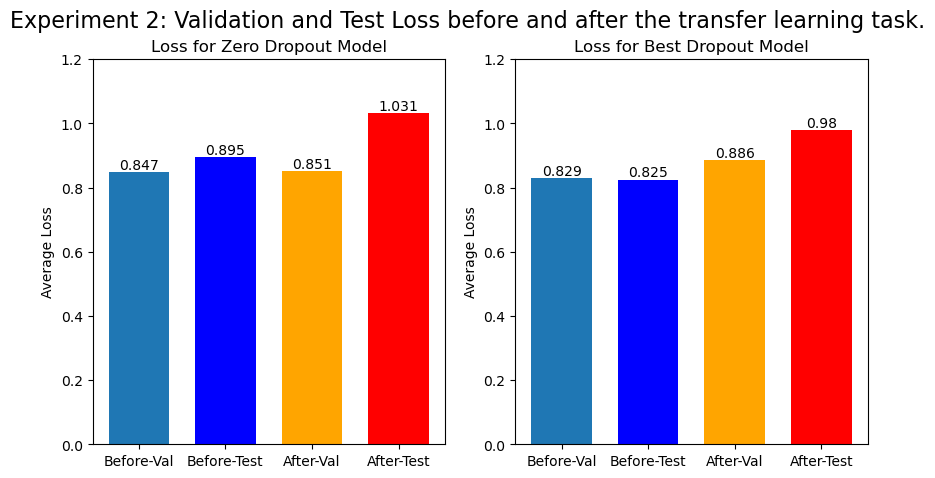

In [64]:
###
# This cell is concerned with displaying the differences between Models before and after transfer learning task, to show any improvements.
###

# get best validaiton loss during transfer training to compare with test loss
lowest_val_loss_post_trans_zd = min(transfer_learning_statistics['zero_dropout']['val_loss'])
lowest_val_loss_post_trans_bd = min(transfer_learning_statistics['best_dropout']['val_loss'])

lowest_val_loss_pre_trans_zd = bst_nd_mdl_vl
lowest_val_loss_pre_trans_bd = bst_do_mdl_vl

# plot bar chart for both models losses on test set.
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Experiment 2: Validation and Test Loss before and after the transfer learning task.", fontsize=16)

# create lists for labels and colours
fig_labels = ["Before-Val", "Before-Test", "After-Val","After-Test"]
fig_colours = ["#1f77b4", "blue", "orange", "red"]
#create lists for bars
zd_bars = [lowest_val_loss_pre_trans_zd, average_test_loss_no_dropout_model,  lowest_val_loss_post_trans_zd, average_test_loss_no_dropout_model_after_transfer]
bd_bars = [lowest_val_loss_pre_trans_bd, average_test_loss_best_dropout_model, lowest_val_loss_post_trans_bd, average_test_loss_best_dropout_model_after_transfer]

# plot zero dropout model test loss
axs[0].bar(fig_labels, zd_bars, width=0.7, color=fig_colours)
axs[0].set_title("Loss for Zero Dropout Model") # add title
axs[0].set_ylabel("Average Loss") # set y label to loss
axs[0].set_ylim(0, 1.2) # set y limit to 2.3

for index,value in enumerate(zd_bars):
    axs[0].text(index, value, str(round(value, 3)), ha='center', va='bottom')

# plot best dropout model test loss
axs[1].bar(fig_labels, bd_bars, width=0.7, color=fig_colours)
axs[1].set_title("Loss for Best Dropout Model") # add title
axs[1].set_ylabel("Average Loss") # set y label to loss
axs[1].set_ylim(0, 1.2) # set y limit to 2.3

for index,value in enumerate(bd_bars):
    axs[1].text(index, value, str(round(value, 3)), ha='center', va='bottom')

# difference between val and test shows how well the model generalises on unseen data.

print(f"Difference between zero dropout before and after loss: {average_test_loss_no_dropout_model_after_transfer - average_test_loss_no_dropout_model}")
print(f"Difference between best dropout before and after loss: {average_test_loss_best_dropout_model_after_transfer - average_test_loss_best_dropout_model}")
      

# It would be expected for there to be a smaller differenece between the val and test losses after the transfer learning task, as the model should generalise better on the unseen data and therefore be able to perform more closely on both the validation and tesing set.
# However, the results show that the difference in model performance between the validation and test set has actually grown larger, rather than smaller as expected. 
# This can be explained by the assumption that the model has overfit, and is supported by the fact that the difference between the validation and test losses are decreased on the dropout model, aimed at reducing overfitting.

# Overall both models perform worse after the transfer learning task, with the zero dropout model without the fine-tuning task performing better than any other model in this experiment, with a test loss of 0.825.


# A Natural explanation to this would be that this is due to overfitting on the validation set during the transfer learning task, 
# but the results show that the dropout model has a larger difference between the val and test losses than the zero dropout model.
# 

plt.show()
# Figure X: Bar chart showing the average validation and average test losses for both models before and after the transfer learning task.

### Experiment 3 (19 MARKS) <ignore>

*Write up results for Experiment 3*

In [28]:
#############################
### Code for Experiment 3 ###
#############################

##########
# PART 1 #
##########

##
# This cell invovles the creation of functions to do Experiment 3 task 1's gradient flow investigation.
## 



def train_and_record_gradients_exp3task1(model, num_epochs, train_dataloader):
    """
    Trains a model for a number of epochs and records the gradients of the model's parameters.

    Args:
        model: The model to train and record gradients for.
        num_epochs: The number of epochs to train for.
        train_loader (_type_): the training dataloader to use.
        val_loader (_type_): the validation dataloader to use.
    
    Returns:
        gradients: A dictionary containing the gradients of the model's parameters over the course of training.
    """


    # Create empty lists to store gradients for each layer and parameter type. Lists contain gradients over each epoch.
    # writing this was a slog, I could've probably done it through code but whatever..
    gradients = {
    'conv1': {'start': {'weight': [], 'bias': []}, 'end': {'weight': [], 'bias': []}},
    'conv2': {'start': {'weight': [], 'bias': []}, 'end': {'weight': [], 'bias': []}},
    'conv3': {'start': {'weight': [], 'bias': []}, 'end': {'weight': [], 'bias': []}},
    'fc1': {'start': {'weight': [], 'bias': []}, 'end': {'weight': [], 'bias': []}},
    'fc2': {'start': {'weight': [], 'bias': []}, 'end': {'weight': [], 'bias': []}}
    }
   

    # Move model to device if not already done
    model.to(device)

    # Define loss fn
    loss_fn = nn.CrossEntropyLoss()

    # Define optimiser
    optimiser = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)


    # train the model for num_epochs epochs, recording gradients for each layer and parameter type over all epochs
    for epoch in range(1, num_epochs+1):
        print(f"Starting epoch {epoch}.")
        # perform a pass over the training set
        model, _, _, _ = exp1_train(model, train_dataloader, loss_fn, optimiser, device) # can once again use exp1_train function.

        # For every layer and parameter in the model, record the gradients.
        for name, param in model.named_parameters():
            # get layer name and type strings for dict.
            layer_name = name.split(".")[0]
            layer_type = name.split(".")[1]

            # retroactively adding a check for batch norm layers.
            if 'bn' not in layer_name:
            
                if epoch <= 5:
                    # add gradients to start list
                    gradients[layer_name]['start'][layer_type].append(param.grad)

                elif epoch > 35:
                    # add gradients to end list
                    gradients[layer_name]['end'][layer_type].append(param.grad)
    print(f"Gradients recorded.")
    return gradients


def convert_gradients_to_plot_input(gradients):
    """
    Converts a gradient dictionary into means and stddev for plotting.

    Args:
        gradients: The dictionary to convert.

    Returns:
        A dictionary containing the mean and stddev of each epoch for each layer's start and end.
    """
    
    # create empty dictionary to store means and stddevs for each layer's start and end over all epochs.
    plot_dict = {
    'conv1': {'start': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}, 'end': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}},
    'conv2': {'start': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}, 'end': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}},
    'conv3': {'start': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}, 'end': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}},
    'fc1':{'start': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}, 'end': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}},
    'fc2':{ 'start': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}, 'end': {'weight': {'mean': [], 'stddev': []}, 'bias': {'mean': [], 'stddev': []}}}
    }

    # iterate over each layer, epoch position, and parameter type in the gradients dictionary.
    for layer_name in plot_dict.keys():
        for epoch_position in plot_dict[layer_name].keys():
            for param_type in plot_dict[layer_name][epoch_position].keys():
                for epoch in range(len(gradients[layer_name][epoch_position][param_type])):
                    # get the gradients for the current layer and parameter type
                    layer_gradients_at_epoch = gradients[layer_name][epoch_position][param_type][epoch]
                    
                    # get the mean and stddev of the gradients
                    mean = torch.mean(layer_gradients_at_epoch.cpu())
                    stddev = torch.std(layer_gradients_at_epoch.cpu())

                    # add the mean and stddev to the plot dictionary
                    plot_dict[layer_name][epoch_position][param_type]['mean'].append(mean)
                    plot_dict[layer_name][epoch_position][param_type]['stddev'].append(stddev)

    return plot_dict


def display_gradients_in_plot(plot_dict, super_title):
    # Create Super Figure for all learning rates
    fig, axs = plt.subplots(5, 2, figsize=(15, 20))
    fig.subplots_adjust(hspace=0.4)

    fig.suptitle(super_title, fontsize=16)

    # create epoch range for x axis
    start_epoch_range = list(range(1, 6))
    end_epoch_range = list(range(36, 41))

    # for each layer of the network...
    for layer_idx, layer in enumerate(plot_dict.keys()):
        # for the start and end of the layer's training...
        for start_or_end_idx, epoch_position in enumerate(plot_dict[layer].keys()):
            if epoch_position == "start":
                epoch_range = np.array(start_epoch_range)
            else:
                epoch_range = np.array(end_epoch_range)
            # for each parameter (weight and bias) in the layer...
            for param_type in plot_dict[layer][epoch_position].keys():
                # get the mean and stddev lists of the gradients at the epochs.
                mean_list = plot_dict[layer][epoch_position][param_type]['mean']
                stddev_list = plot_dict[layer][epoch_position][param_type]['stddev']

                # offset x axis for bias parameters to make it easier to see.
                if param_type == "bias":
                    plot_epoch_range = epoch_range + 0.05
                else:
                    plot_epoch_range = epoch_range
                

                # plot the mean and stddev for the current layer, epoch position and parameter type.
                axs[layer_idx, start_or_end_idx].errorbar(plot_epoch_range, mean_list, yerr=stddev_list, label=f"{layer} {param_type}")
                axs[layer_idx, start_or_end_idx].set_title(layer, fontweight='bold')
                axs[layer_idx, start_or_end_idx].set_xlabel("Epoch")
                axs[layer_idx, start_or_end_idx].set_ylabel("Gradient μ and σ")
                axs[layer_idx, start_or_end_idx].legend(loc='upper left')
                axs[layer_idx, start_or_end_idx].set_xticks(epoch_range)
                axs[layer_idx, start_or_end_idx].set_ylim(-0.25, 0.25)
                axs[layer_idx, start_or_end_idx].grid(True, alpha=0.3 )





In [101]:

###
# This cell is concerned with training the model and recording the gradients for part 1 of Experiment 3.
###

# check files don't already exist, if they do, warn and exit.
try:
    with open("exp3/results/exp3_part_1_results.pkl", "rb") as file:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except Exception:
    None

# create 80:20 train val split. only concerned with training set for this experiment.
train_loader, _ = exp1_create_train_val_split(246518)

# Create a model, using baseline network for part 1.
exp3_part_1_model = BaselineNetwork()

# Train and record gradients for the model over 40 epochs.
exp3_part_1_gradients = train_and_record_gradients_exp3task1(exp3_part_1_model, 40, train_loader)



# Save model to file
with open("exp3/models/exp3_part_1_model.pkl", "wb") as file:
    pickle.dump(exp3_part_1_model, file)
    print("Model saved to file")


# Save results to file
with open("exp3/results/exp3_part_1_results.pkl", "wb") as file:
    pickle.dump(exp3_part_1_gradients, file)
    print("Results saved to file")

Starting epoch 1.
Starting epoch 2.
Starting epoch 3.
Starting epoch 4.
Starting epoch 5.
Starting epoch 6.
Starting epoch 7.
Starting epoch 8.
Starting epoch 9.
Starting epoch 10.
Starting epoch 11.
Starting epoch 12.
Starting epoch 13.
Starting epoch 14.
Starting epoch 15.
Starting epoch 16.
Starting epoch 17.
Starting epoch 18.
Starting epoch 19.
Starting epoch 20.
Starting epoch 21.
Starting epoch 22.
Starting epoch 23.
Starting epoch 24.
Starting epoch 25.
Starting epoch 26.
Starting epoch 27.
Starting epoch 28.
Starting epoch 29.
Starting epoch 30.
Starting epoch 31.
Starting epoch 32.
Starting epoch 33.
Starting epoch 34.
Starting epoch 35.
Starting epoch 36.
Starting epoch 37.
Starting epoch 38.
Starting epoch 39.
Starting epoch 40.
Gradients recorded.
Model saved to file
Results saved to file


{'conv1': {'start': {'weight': {'mean': [tensor(-0.0063), tensor(-0.0161), tensor(-0.0116), tensor(0.0051), tensor(0.0039)], 'stddev': [tensor(0.0156), tensor(0.0601), tensor(0.0913), tensor(0.0777), tensor(0.0703)]}, 'bias': {'mean': [tensor(-0.0029), tensor(0.0259), tensor(0.0124), tensor(0.0121), tensor(0.0087)], 'stddev': [tensor(0.0140), tensor(0.1534), tensor(0.0707), tensor(0.1226), tensor(0.0694)]}}, 'end': {'weight': {'mean': [tensor(0.0260), tensor(0.0126), tensor(0.0062), tensor(-0.0012), tensor(0.0416)], 'stddev': [tensor(0.1044), tensor(0.0691), tensor(0.1391), tensor(0.0757), tensor(0.1433)]}, 'bias': {'mean': [tensor(0.0043), tensor(0.0144), tensor(0.0404), tensor(-0.0421), tensor(0.0124)], 'stddev': [tensor(0.1368), tensor(0.0629), tensor(0.1482), tensor(0.1832), tensor(0.1257)]}}}, 'conv2': {'start': {'weight': {'mean': [tensor(-0.0009), tensor(-0.0023), tensor(-0.0016), tensor(-0.0048), tensor(0.0035)], 'stddev': [tensor(0.0051), tensor(0.0338), tensor(0.0217), tensor

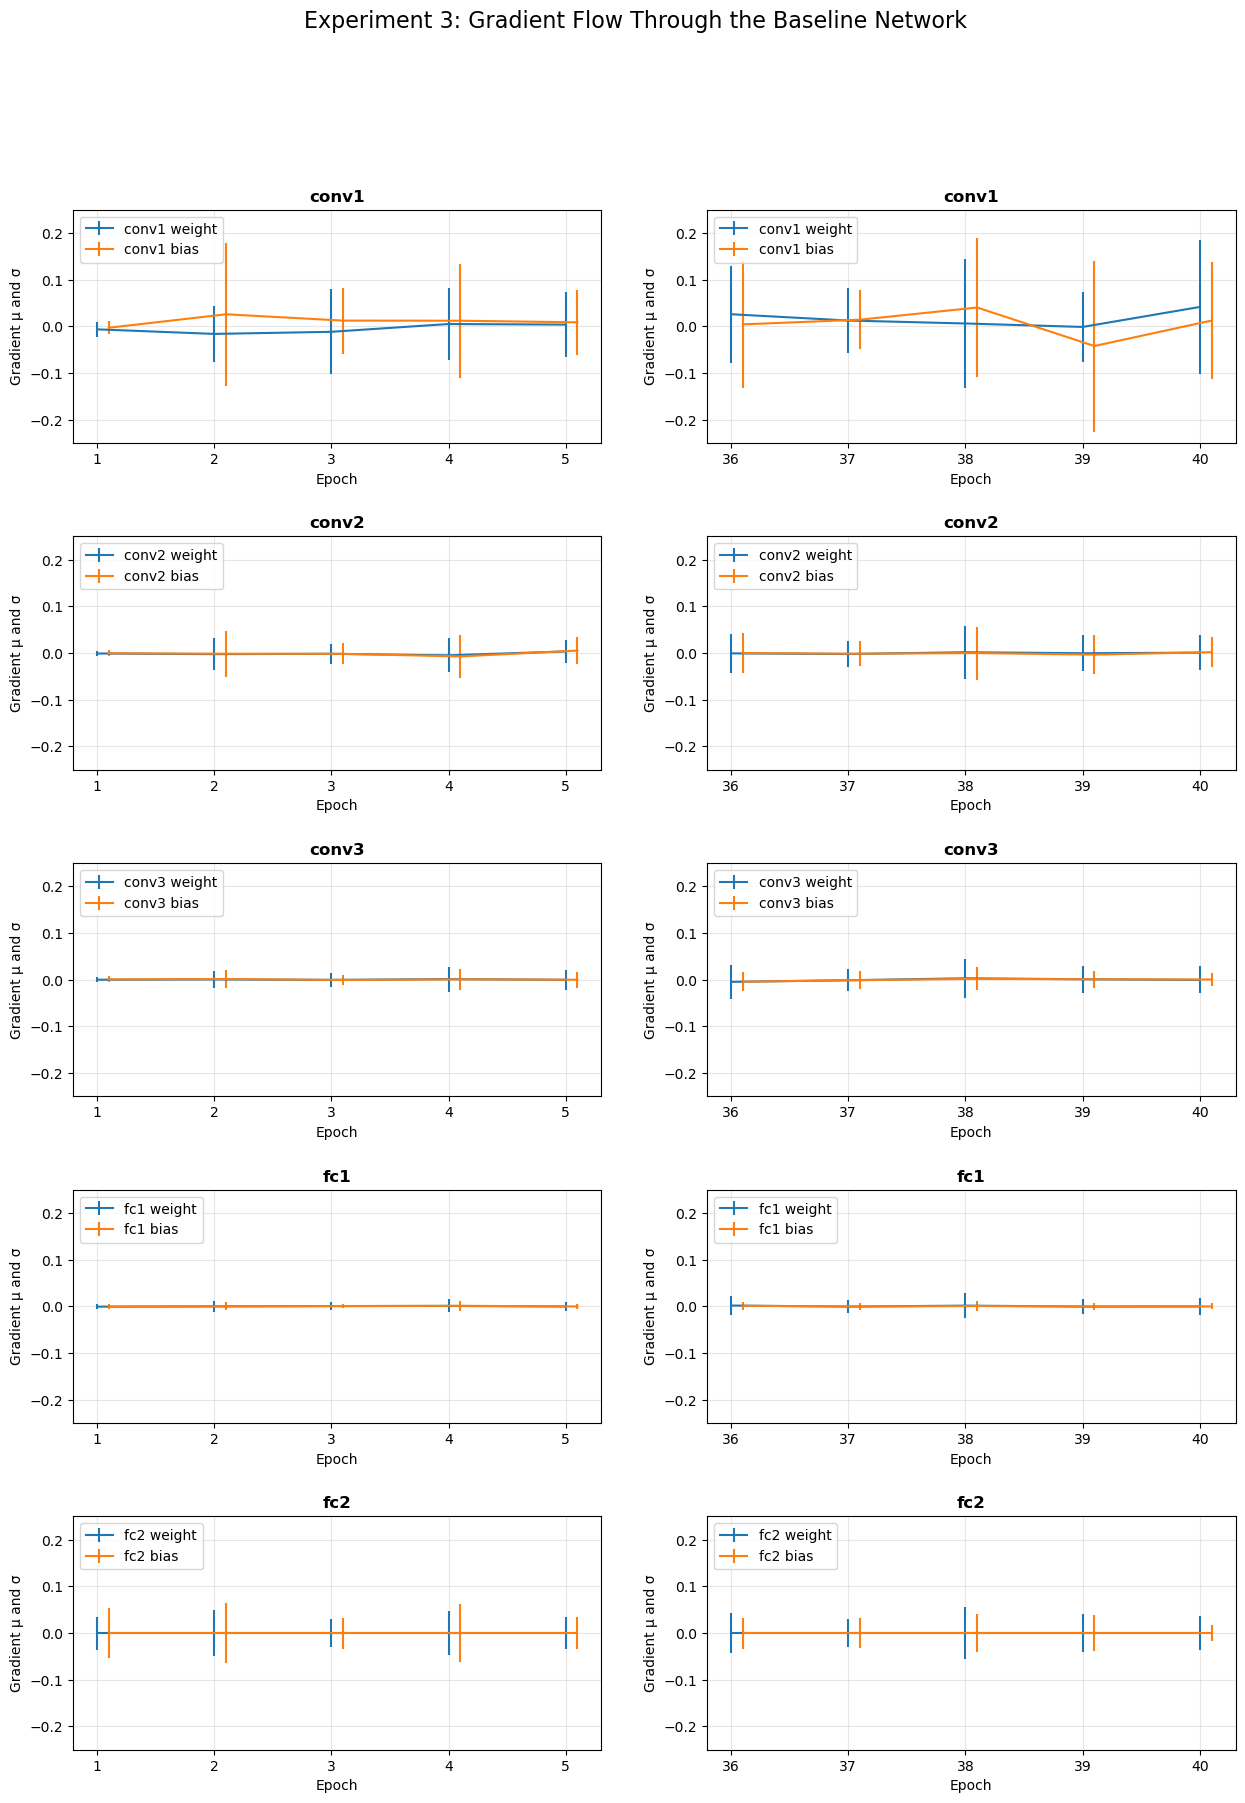

In [160]:
###
# This cell is concerned with displaying the results of the gradient flow investigation for Experiment 3 part 1.
###

# Load results from file
with open("exp3/results/exp3_part_1_results.pkl", "rb") as file:
    exp3_part_1_gradients = pickle.load(file)


# Convert gradients to plot input
plot_dict = convert_gradients_to_plot_input(exp3_part_1_gradients)
print(plot_dict)
# Create Super Figure for all learning rates
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.4)

fig.suptitle(f"Experiment 3 Part 1: Gradient Flow Through the Baseline Network", fontsize=16)

# create epoch range for x axis
start_epoch_range = list(range(1, 6))
end_epoch_range = list(range(36, 41))

# for each layer of the network...
for layer_idx, layer in enumerate(plot_dict.keys()):
    # for the start and end of the layer's training...
    for start_or_end_idx, epoch_position in enumerate(plot_dict[layer].keys()):
        if epoch_position == "start":
            epoch_range = np.array(start_epoch_range)
        else:
            epoch_range = np.array(end_epoch_range)
        # for each parameter (weight and bias) in the layer...
        for param_type in plot_dict[layer][epoch_position].keys():
            # get the mean and stddev lists of the gradients at the epochs.
            mean_list = plot_dict[layer][epoch_position][param_type]['mean']
            stddev_list = plot_dict[layer][epoch_position][param_type]['stddev']

            # offset x axis for bias parameters to make it easier to see.
            if param_type == "bias":
                 plot_epoch_range = epoch_range + 0.05
            else:
                plot_epoch_range = epoch_range
            

            # plot the mean and stddev for the current layer, epoch position and parameter type.
            axs[layer_idx, start_or_end_idx].errorbar(plot_epoch_range, mean_list, yerr=stddev_list, label=f"{layer} {param_type}")
            axs[layer_idx, start_or_end_idx].set_title(layer, fontweight='bold')
            axs[layer_idx, start_or_end_idx].set_xlabel("Epoch")
            axs[layer_idx, start_or_end_idx].set_ylabel("Gradient μ and σ")
            axs[layer_idx, start_or_end_idx].legend(loc='upper left')
            axs[layer_idx, start_or_end_idx].set_xticks(epoch_range)
            axs[layer_idx, start_or_end_idx].set_ylim(-0.25, 0.25)
            axs[layer_idx, start_or_end_idx].grid(True, alpha=0.3 )

            



In [18]:
###
# This cell is concerned with training the dropout model and recording the gradients for part 2 of Experiment 3.
###

# check files don't already exist, if they do, warn and exit.
try:
    with open("exp3/results/exp3_part_2_results.pkl", "rb") as file:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except Exception:
    None

# create 80:20  train val split (done again as kernel restarts)
train_loader, _ = exp1_create_train_val_split(246518)

# Create a model, using best dropout network for part 2.
exp3_part_2_model = DropoutNetwork(0.35)

# train and record the gradients for the model over 40 epochs - turns out this is the same as the previous function, so I can just use that.
exp3_part_2_gradients = train_and_record_gradients_exp3task1(exp3_part_2_model, 40, train_loader)

# Save model to file
with open("exp3/models/exp3_part_2_model.pkl", "wb") as file:
    pickle.dump(exp3_part_2_model, file)
    print("Model saved to file")

# Save results to file
with open("exp3/results/exp3_part_2_results.pkl", "wb") as file:
    pickle.dump(exp3_part_2_gradients, file)
    print("Results saved to file")



Starting epoch 1.
Starting epoch 2.
Starting epoch 3.
Starting epoch 4.
Starting epoch 5.
Starting epoch 6.
Starting epoch 7.
Starting epoch 8.
Starting epoch 9.
Starting epoch 10.
Starting epoch 11.
Starting epoch 12.
Starting epoch 13.
Starting epoch 14.
Starting epoch 15.
Starting epoch 16.
Starting epoch 17.
Starting epoch 18.
Starting epoch 19.
Starting epoch 20.
Starting epoch 21.
Starting epoch 22.
Starting epoch 23.
Starting epoch 24.
Starting epoch 25.
Starting epoch 26.
Starting epoch 27.
Starting epoch 28.
Starting epoch 29.
Starting epoch 30.
Starting epoch 31.
Starting epoch 32.
Starting epoch 33.
Starting epoch 34.
Starting epoch 35.
Starting epoch 36.
Starting epoch 37.
Starting epoch 38.
Starting epoch 39.
Starting epoch 40.
Gradients recorded.
Model saved to file
Results saved to file


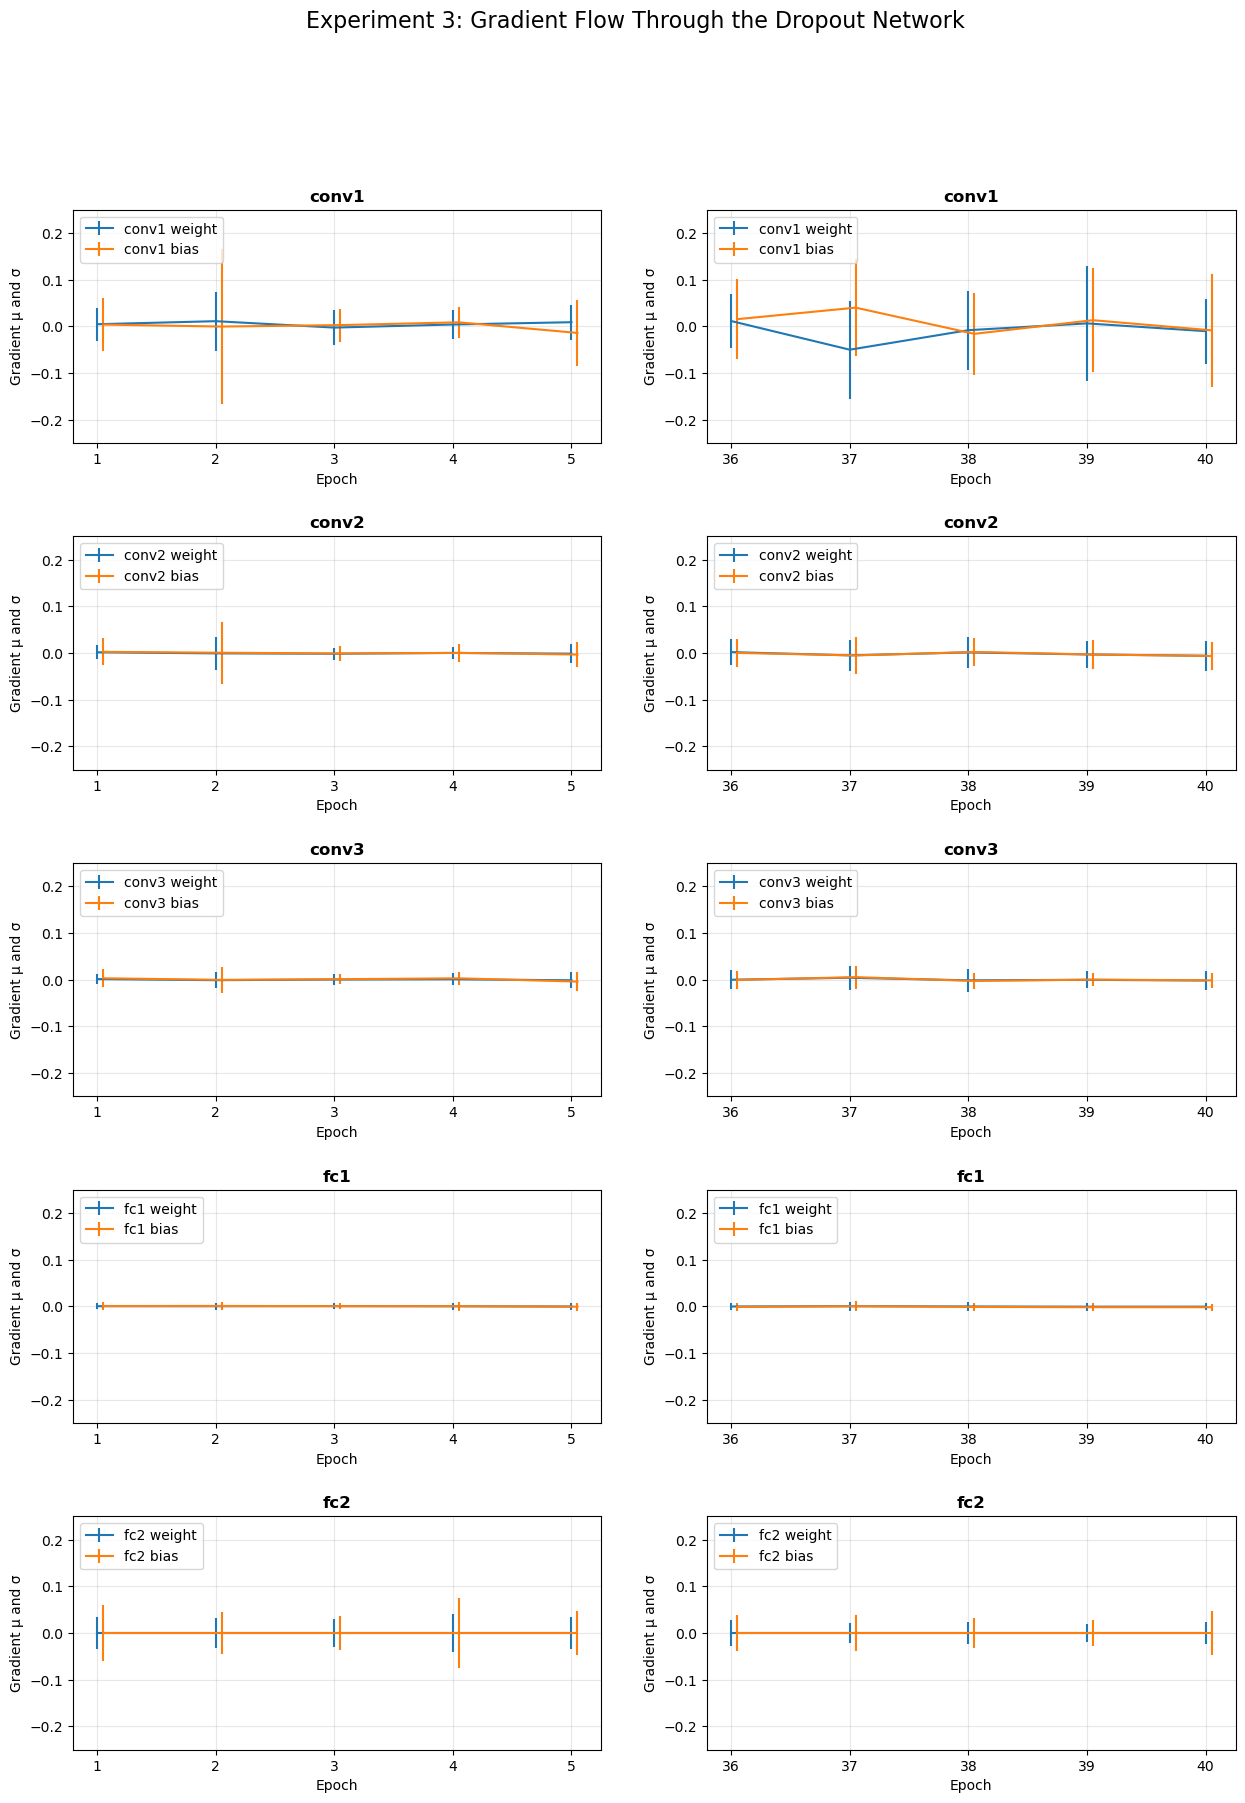

In [20]:
###
# This cell is concerned with displaying the results of the gradient flow investigation for part 2 of Experiment 3.
###

# Load results from file
with open("exp3/results/exp3_part_2_results.pkl", "rb") as file:
    exp3_part_2_gradients = pickle.load(file)


# Convert gradients to plot input
plot_dict = convert_gradients_to_plot_input(exp3_part_2_gradients)


display_gradients_in_plot(plot_dict, "Experiment 3: Gradient Flow Through the Dropout Network")




# # Create Super Figure for all learning rates
# fig, axs = plt.subplots(5, 2, figsize=(15, 20))
# fig.subplots_adjust(hspace=0.4)

# fig.suptitle(f"Experiment 3: Gradient Flow Through the Dropout Network", fontsize=16)

# # create epoch range for x axis
# start_epoch_range = list(range(1, 6))
# end_epoch_range = list(range(36, 41))

# # for each layer of the network...
# for layer_idx, layer in enumerate(plot_dict.keys()):
#     # for the start and end of the layer's training...
#     for start_or_end_idx, epoch_position in enumerate(plot_dict[layer].keys()):
#         if epoch_position == "start":
#             epoch_range = np.array(start_epoch_range)
#         else:
#             epoch_range = np.array(end_epoch_range)
#         # for each parameter (weight and bias) in the layer...
#         for param_type in plot_dict[layer][epoch_position].keys():
#             # get the mean and stddev lists of the gradients at the epochs.
#             mean_list = plot_dict[layer][epoch_position][param_type]['mean']
#             stddev_list = plot_dict[layer][epoch_position][param_type]['stddev']

#             # offset x axis for bias parameters to make it easier to see.
#             if param_type == "bias":
#                  plot_epoch_range = epoch_range + 0.05
#             else:
#                 plot_epoch_range = epoch_range
            

#             # plot the mean and stddev for the current layer, epoch position and parameter type.
#             axs[layer_idx, start_or_end_idx].errorbar(plot_epoch_range, mean_list, yerr=stddev_list, label=f"{layer} {param_type}")
#             axs[layer_idx, start_or_end_idx].set_title(layer, fontweight='bold')
#             axs[layer_idx, start_or_end_idx].set_xlabel("Epoch")
#             axs[layer_idx, start_or_end_idx].set_ylabel("Gradient μ and σ")
#             axs[layer_idx, start_or_end_idx].legend(loc='upper left')
#             axs[layer_idx, start_or_end_idx].set_xticks(epoch_range)
#             axs[layer_idx, start_or_end_idx].set_ylim(-0.25, 0.25)
#             axs[layer_idx, start_or_end_idx].grid(True, alpha=0.3 )

            



In [ ]:
###
# This cell is concerned with comparing the two models' gradient flows.
###


In [22]:
###
# This cell is concerned with setting up classes and functions for experiment 3 part 3 and 4. 
###

# Turns out that this is called "Batch Normalisation" not "Batch Regularisation" as I have written throughout this code. Please ignore the class and variable names, i've changed it where it's important for figures and results. 
# Any code level changes would require a lot of refactoring that isn't really necessary for the results, so anywhere where you see "BR" or "Batch Regularisation" just imagine it says "BN" or "Batch Normalisation" instead.

class BRNetwork(nn.Module):
    """
    Class for a Batch Reguralised Network. 
    The code for this class is based on the code for the BaselineNetwork class.
    """

    def __init__(self):
        """
            Creates the BR network with already randomised weights.
        """
        super().__init__()
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create batch norm layer for conv1
        self.bn1 = nn.BatchNorm2d(16)
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create batch norm layer for conv2
        self.bn2 = nn.BatchNorm2d(32)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)
        # Create batch norm layer for conv3
        self.bn3 = nn.BatchNorm2d(48)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create batch norm layer for fc1
        self.bn4 = nn.BatchNorm1d(160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)


    def forward(self, x):
        """
            Performs a forward pass of a batch / instance

            args:
                x: The input tensor, a 32x32x3 image or batch of images.
            returns:
                x: The final FC layer's logits.

        """
        # ---- Convolution Layers ----
        # First CNN layer with batch norm
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Second CNN layer with batch norm
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Third CNN layer with batch norm
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # ---- Linear Layers ----
        # Flatten to use in Linear Layers 
        x = x.view(-1, 48*3*3)
        # First Linear Layer with batch norm
        x = F.relu(self.bn4(self.fc1(x))) 
        # Second Linear Layer. Doesn't use an activation
        x = self.fc2(x)
        # No softmax function is used here as loss fn handles it.

        return x
    

def do_one_exp3_task4_run(index, num_epochs, train_loader, val_loader):
    """
    Completes one run of Experiment 3's task 4, training a Batch Regularised network for a number of epochs and recording the training and validation losses.

    Args:
        index: The index of the run.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader : The validation dataloader to use.

    Returns:
        train_losses: A list of the training losses for each epoch.
        val_losses: A list of the validation losses for each epoch.
        model_list: A list of the model at each epoch.
    """
    

    # Create BR model
    model = BRNetwork()

    # Move model to GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define optimizer using experiment 1's best performing learning rate
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []

    # Create list to store models
    model_list = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set
        model, _, _, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device) # exp1's train function has found to be very reusable throughout this entire notebook!

        # Perform a pass over the validation set.
        model, _, _, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)

        # Add losses to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        model_list.append(model)

        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}")
    
    print(f"    Run {index} complete.")

    return train_losses, val_losses, model_list
    





In [31]:
##
# This cell is concerned with collecting the gradients for the model with batch reguralisation.
##

# check files don't already exist, if they do, warn and exit.
try:
    with open("exp3/results/exp3_part_3_results.pkl", "rb") as file:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except Exception:
    None

try:
    with open("exp3/models/exp3_part_3_model.pkl", "rb") as file:
        print("Model file already exists. Exiting...")
        raise IOError("Model file already exists.")
except Exception:
    None

# create 80:20  train val split (done again as kernel restarts)
train_loader, _ = exp1_create_train_val_split(246518)

# Create a model with batch regularisation.
exp3_part_3_model = BRNetwork()

# Train and record gradients for the model over 40 epochs. (This code can once again just be reused from the previous tasks.)
exp3_part_3_gradients = train_and_record_gradients_exp3task1(exp3_part_3_model, 40, train_loader)

# Save model to file
with open("exp3/models/exp3_part_3_model.pkl", "wb") as file:
    pickle.dump(exp3_part_3_model, file)
    print("Model saved to file")

# Save results to file
with open("exp3/results/exp3_part_3_results.pkl", "wb") as file:
    pickle.dump(exp3_part_3_gradients, file)
    print("Results saved to file")

Starting epoch 1.
Starting epoch 2.
Starting epoch 3.
Starting epoch 4.
Starting epoch 5.
Starting epoch 6.
Starting epoch 7.
Starting epoch 8.
Starting epoch 9.
Starting epoch 10.
Starting epoch 11.
Starting epoch 12.
Starting epoch 13.
Starting epoch 14.
Starting epoch 15.
Starting epoch 16.
Starting epoch 17.
Starting epoch 18.
Starting epoch 19.
Starting epoch 20.
Starting epoch 21.
Starting epoch 22.
Starting epoch 23.
Starting epoch 24.
Starting epoch 25.
Starting epoch 26.
Starting epoch 27.
Starting epoch 28.
Starting epoch 29.
Starting epoch 30.
Starting epoch 31.
Starting epoch 32.
Starting epoch 33.
Starting epoch 34.
Starting epoch 35.
Starting epoch 36.
Starting epoch 37.
Starting epoch 38.
Starting epoch 39.
Starting epoch 40.
Gradients recorded.
Model saved to file
Results saved to file


In [ ]:
###
# This code is concerned with displaying the results of the gradient flow of part 3 of experiment 3.
###

# Load results from file
with open("exp3/results/exp3_part_3_results.pkl", "rb") as file:
    exp3_part_3_gradients = pickle.load(file)



In [23]:
###
# This cell is concerned with training the model and saving its validation and training losses for part 4 of experiment 3
###

# check files don't already exist, if they do, warn and exit.
try:
    with open("exp3/results/exp3_part_4_results.pkl", "rb") as file:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except Exception:
    None

try:
    with open("exp3/models/exp3_part_4_models.pkl", "rb") as file:
        print("Model file already exists. Exiting...")
        raise IOError("Model file already exists.")
except Exception:
    None

# create 80:20  train val split (once again done as kernel likes to restart and i don't want to run training cells again.)
train_loader, val_loader = exp1_create_train_val_split(246518)

# Define lists to store losses, accuracies and models for each run.
exp3_part4_stats_dict = {name:{idx:[] for idx in range(1, 6)} for name in ['train_loss', 'val_loss']}
exp3_part4_model_list = {idx:[] for idx in range(1, 6)}


for exp_idx in range(1, 6):
    
    # Run the experiment
    train_losses, val_losses, model_list = do_one_exp3_task4_run(exp_idx, 40, train_loader, val_loader)

    # store training losses
    exp3_part4_stats_dict['train_loss'][exp_idx].append(train_losses)
    # store validation losses
    exp3_part4_stats_dict['val_loss'][exp_idx].extend(val_losses)
    # store models
    exp3_part4_model_list[exp_idx].extend(model_list)

# Save results to file
with open("exp3/results/exp3_part_4_results.pkl", "wb") as file:
    pickle.dump(exp3_part4_stats_dict, file)
    print("Results saved to file")

# Save models to file
with open("exp3/models/exp3_part_4_models.pkl", "wb") as file:
    pickle.dump(exp3_part4_model_list, file)
    print("Models saved to file")


        Epoch 1 train loss: 1.4872867586612701, val loss: 1.1997425299102125
        Epoch 2 train loss: 1.130094547367096, val loss: 1.0755901035790245
        Epoch 3 train loss: 0.9985859968662262, val loss: 0.9608956832474413
        Epoch 4 train loss: 0.914537300491333, val loss: 0.8739832765378129
        Epoch 5 train loss: 0.8587140127182007, val loss: 0.8578496638197488
        Epoch 6 train loss: 0.8143185953617096, val loss: 0.8394447283242077
        Epoch 7 train loss: 0.7744282689094544, val loss: 0.800004821711074
        Epoch 8 train loss: 0.7386110492706299, val loss: 0.7691578613683439
        Epoch 9 train loss: 0.7104421722888946, val loss: 0.7302152863897073
        Epoch 10 train loss: 0.6809883301734925, val loss: 0.7294516696240574
        Epoch 11 train loss: 0.6569114374876023, val loss: 0.7466902722375461
        Epoch 12 train loss: 0.6370526278972626, val loss: 0.7189811499545369
        Epoch 13 train loss: 0.6208753861665726, val loss: 0.715157029061271

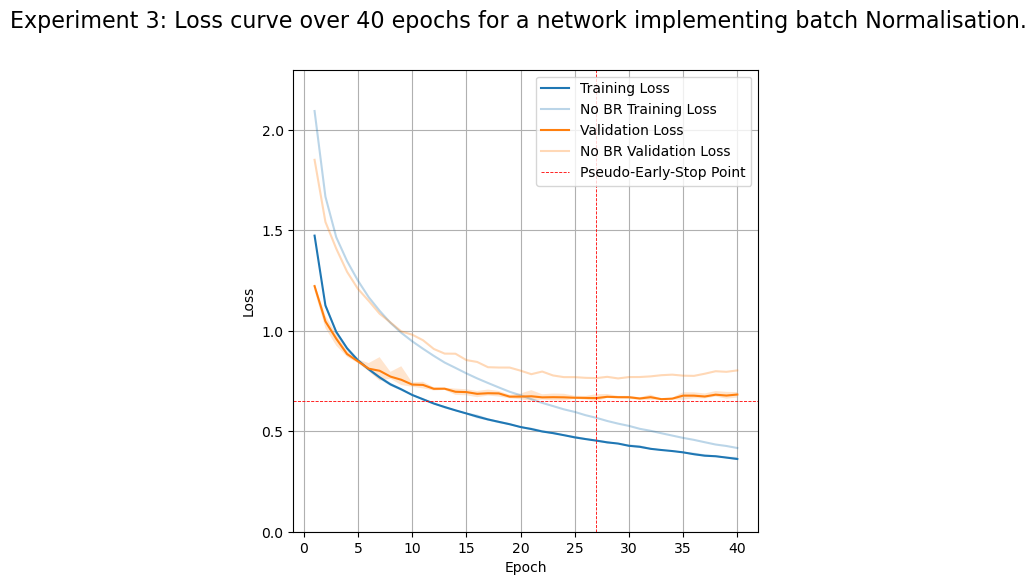

Best performing epoch for the batch normalisation model was epoch 27 with a validation loss of 0.6506994539937272


In [76]:
###
# This cell is concerned with plotting the results of part 4 of experiment 3.
###

# Load results from file
with open("exp3/results/exp3_part_4_results.pkl", "rb") as file:
    exp3_part4_stats_dict = pickle.load(file)

# Load results from experiment 1 to compare with.
with open("exp1/results/exp1_results.pkl", "rb") as file:
    all_statistics = pickle.load(file)
# single out learning rate 1e-3 results as that learning rate is used in this experiment.
exp1_1e3_stats = all_statistics[1e-3]



# create overall lists to store values for 
val_loss_values = []
train_loss_values = []
train_loss_values_old = []
val_loss_values_old = []

# iterate over each test index, adding values to overall lists for the models with and without batch regularisation.
for idx in range(1, number_of_experiment_runs+1):
    # with BN
    val_loss_values.append(exp3_part4_stats_dict['val_loss'][idx])
    train_loss_values.append(exp3_part4_stats_dict['train_loss'][idx][0])
    
    # Without BN from exp1
    val_loss_values_old.append(exp1_1e3_stats['val_loss'][idx][0])
    train_loss_values_old.append(exp1_1e3_stats['train_loss'][idx][0])



# Calculate the average values for each metric over sub experiments.
average_train_losses = np.mean(train_loss_values, axis=0)
average_val_losses = np.mean(val_loss_values, axis=0)

# Get the average values for the same model without batch regularisation for comparison.
average_train_losses_old = np.mean(train_loss_values_old, axis=0)
average_val_losses_old = np.mean(val_loss_values_old, axis=0)


# Get the largest values for each metric over all sub experiments.
max_train_losses = np.max(train_loss_values, axis=0)
max_val_losses = np.max(val_loss_values, axis=0)

# Get the smallest values for each metric over all sub experiments.
min_train_losses = np.min(train_loss_values, axis=0)
min_val_losses = np.min(val_loss_values, axis=0)



# Get the index of the best performing epoch for this learning rate.
best_val_loss_epoch = int(np.argmin(min_val_losses)) + 1


# create epoch range for x axis
epoch_range = list(range(1, 41))

# Create Super Figure for all learning rates
fig, axs = plt.subplots(1, 1, figsize=(6, 6))

fig.suptitle(f"Experiment 3: Loss curve over 40 epochs for a network implementing batch Normalisation.", fontsize=16)

# plot training and validation loss graphs
axs.plot(epoch_range, average_train_losses, label="Training Loss", color='#1f77b4') # plot average training loss
axs.plot(epoch_range, average_train_losses_old, label = "No BR Training Loss",color='#1f77b4', alpha=0.3) # plot average training loss for no BR model for comparison
axs.plot(epoch_range, average_val_losses, label="Validation Loss", color='#ff7f0e') # plot average validation loss
axs.plot(epoch_range, average_val_losses_old, label = "No BR Validation Loss", alpha=0.3, color='#ff7f0e') # plot average validation loss for no BR model for comparison
axs.axvline(best_val_loss_epoch, color='r', linestyle='--', linewidth=0.6, label="Pseudo-Early-Stop Point") # plot line going to best val loss epoch
axs.axhline(min_val_losses[best_val_loss_epoch-1], color='r', linestyle='--', linewidth=0.6) # plot line going to best val loss value

axs.fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
axs.fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
axs.set_xlabel("Epoch") # set x label to epoch
axs.set_ylabel("Loss") # set y label to loss
axs.legend() # turn on legend
axs.grid(True) # turn on grid
axs.set_ylim(0, 2.3) # set y limit to 2.3
axs.set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

plt.show()

print(f"Best performing epoch for the batch normalisation model was epoch {best_val_loss_epoch} with a validation loss of {min_val_losses[best_val_loss_epoch-1]}")

In [66]:
###
# This cell is concerned with comparing and displaying the test losses for the BR model.
###

# Load best performing model from file.
with open("exp3/models/exp3_part_4_model.pkl", "rb") as file:
    exp3_part4_model_list = pickle.load(file)

best_exp3_part4_model = exp3_part4_model_list[1][26]

_, _, _, average_test_loss = exp1_evaluate(best_exp3_part4_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"BR Model tested on test set has average test loss of: {average_test_loss}") 


BR Model tested on test set has average test loss of: 0.6932616132897691


# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS). 
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

*Write your Conclusions/Discussion here*

# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

# References

Y. Lecun and B. Boser and J.S. Denker and D. Henderson and R.E Howard and W. Hubbard and L.D. Jacket (1990), Handwritten digit recognition with a back-propagation network, Advances in Neural Information Processing Systems pp. 396–404.

A. Krizhevsky and G. Hinton (2009), Learning multiple layers of features from tiny images.

A. Krizhevsky and I. Sutskever and G. Hinton (2012), Imagenet classification with deep convolutional neural networks, Advances in neural information processing systems vol. 25.

B. Recht and R. Roelofs and L Schmidt and Vaishaal Shankar (2018), Do CIFAR-10 Classifiers Generalize to CIFAR-10?, arXiv preprint arXiv:1806.00451.

N. Srivastava and G. Hinton and A. Krizhevsky and R. Salakhutdinov (2014), Dropout: A Simple Way to Prevent Neural Networks from Overfitting, The Journal of Machine Learning Research 15(1) pp. 1929-1958

Y. LeCun and L. Bottou and G. B. Orr and K. R. Müller (1998), Efficient backprop in Neural Networks: Tricks of the trade, pp. 9-50, Springer, 1998

T. Sinha and B. Verma and A. Haidar (2017), Optimization of convolutional neural network parameters for image classification, 2017 IEEE Symposium Series on Computational Intelligence (SSCI), Honolulu, HI, USA, 2017, pp. 1-7, doi: 10.1109/SSCI.2017.8285338.